In [226]:
import math
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

import scipy
import seaborn as sns
import xlsxwriter

import math
from math import exp, sqrt, log

%matplotlib inline

from scipy import stats


import statsmodels.api as sm
from statsmodels.regression.linear_model import OLS
from statsmodels.tsa.stattools import adfuller
from statsmodels.stats.stattools import jarque_bera
from statsmodels.stats.stattools import durbin_watson


import statsmodels.formula.api as smf
import statsmodels.stats.api as sms


import xlsxwriter
#from statsmodels.tsa.ar_model import AR
#from statsmodels.tsa.stattools import grangercausalitytests
#from statsmodels.tsa.tsatools import (lagmat, add_trend)

In [227]:
import eikon
import datetime
 
# Your configuration
app_key = '97c5b917639d4a619467b3cbed7b530d0e625579'  
index = 'STOXX50'
number_of_days = 3650
 
 
# Defines the index RIC and the index chain codes
index_RIC = '.' + index
index_chain = '0#.' + index
 
# Authenticate
eikon.set_app_key(app_key)
 


In [228]:
end = datetime.datetime.now()
start = end - datetime.timedelta(days=number_of_days)


# Read the index into empty dataframe
df_index = eikon.get_timeseries([index_RIC],
                                start_date=start,
                                end_date=end,
                                fields='CLOSE')
 
# Rename "CLOSE" column to the index name to prevent clash
df_index = df_index.rename(columns={'CLOSE': index_RIC})
 
# Read in more stocks
symbols = eikon.get_data(index_chain, 'TR.RIC')[0]['RIC']
 
for symbol in symbols:
    df_temp = eikon.get_timeseries([symbol],
                                   start_date=start,
                                   end_date=end,
                                   fields='CLOSE')
    # Rename to prevent clash
    df_temp = df_temp.rename(columns={'CLOSE': symbol})
 
    # Join the two dataframes
    df_index = df_index.join(df_temp[symbol])
 
# Show the output
print(df_index)

            .STOXX50       BHPB.L  ABBN.S  ADSGn.DE  LINI.DE   BAYGn.DE  \
Date                                                                      
2011-05-12   2637.31  2100.536909   23.32     52.90      NaN  56.969260   
2011-05-13   2619.16  2079.651520   23.19     51.67      NaN  57.284170   
2011-05-16   2619.08  2125.865999   23.24     52.26      NaN  57.471148   
2011-05-17   2594.80  2083.206480   22.98     51.30      NaN  56.093415   
2011-05-18   2606.65  2114.756749   23.05     51.31      NaN  57.018464   
...              ...          ...     ...       ...      ...        ...   
2021-05-03   3402.00          NaN   29.93    259.80    239.6  53.570000   
2021-05-04   3357.93  2196.500000   29.49    252.55    235.7  52.380000   
2021-05-05   3418.10  2306.000000   30.62    259.60    242.5  53.490000   
2021-05-06   3418.96  2314.000000   30.54    258.80    245.5  53.910000   
2021-05-07   3443.78  2337.500000   30.61    280.60    246.4  54.130000   

              SGEF.PA   

In [229]:
df_index.to_excel('raw_data(1).xlsx') #let's save our result as an excel table.However, since everytime we run the previous code, a new timeseries is created, we will use the data saved on 23/04/2021 under 'raw_data.xlsx' for our analysis. 

In [382]:
df_index_raw=pd.read_excel('raw_data.xlsx').set_index('Date')
df_index_raw

.STOXX50       BHPB.L  ABBN.S  ADSGn.DE  LINI.DE   BAYGn.DE  \
Date                                                                      
2011-04-29   2661.37          NaN   23.88    50.260      NaN  58.406038   
2011-05-02   2660.49          NaN   23.56    50.200      NaN  57.205442   
2011-05-03   2651.58  2210.296295   23.01    50.230      NaN  57.618762   
2011-05-04   2614.84  2152.083828   22.86    49.885      NaN  56.477212   
2011-05-05   2608.68  2120.089189   22.60    53.500      NaN  57.057828   
...              ...          ...     ...       ...      ...        ...   
2021-04-19   3412.00  2217.500000   30.44   277.200   239.20  54.960000   
2021-04-20   3350.45  2167.000000   29.73   269.100   237.45  54.140000   
2021-04-21   3386.11  2178.500000   29.82   271.550   241.65  55.850000   
2021-04-22   3407.58  2186.500000   29.75   270.300   242.05  55.690000   
2021-04-23   3396.54  2212.500000   29.95   266.100   240.80  54.530000   

              SGEF.PA        GSK.L  HSBA.L  ADYEN.AS  ...        RIO.L  \
Date                                                  ...                
2011-04-29  44.656441          NaN     NaN       NaN  ...          NaN   
2011-05-02  44.423753          NaN     NaN       NaN  ...          NaN   
2011-05-03  44.398999  1297.516780  662.50       NaN  ...  4025.460406   
2011-05-04  43.755391  1288.150208  651.80       NaN  ...  3893.701015   
2011-05-05  43.463293  1291.601050  646.20       NaN  ...  3832.744713   
...               ...          ...     ...       ...  ...          ...   
2021-04-19  92.080000  1338.000000  428.10    1996.2  ...  6089.000000   
2021-04-20  87.950000  1325.200000  417.25    1981.0  ...  5955.000000   
2021-04-21  87.420000  1348.000000  415.85    2012.5  ...  5974.000000   
2021-04-22  86.960000  1348.400000  415.50    2072.5  ...  6005.000000   
2021-04-23  87.470000  1342.600000  419.00    2107.0  ...  6119.000000   

            DAIGn.DE    BP.L     PRTP.PA  ALVG.DE   SAF.PA  ENEI.MI  AXAF.PA  \
Date                                                                           
2011-04-29     52.19     NaN  110.342430   106.30   26.200    4.814   15.150   
2011-05-02     52.51     NaN  110.205359   105.90   26.220    4.816   15.160   
2011-05-03     51.65  457.95  111.119168   106.35   26.000    4.804   15.215   
2011-05-04     50.74  448.70  110.022597   104.70   25.555    4.730   14.995   
2011-05-05     50.65  441.05  109.245860   100.45   25.350    4.706   15.025   
...              ...     ...         ...      ...      ...      ...      ...   
2021-04-19     75.96  300.85  640.200000   219.10  122.400    8.662   23.750   
2021-04-20     73.69  291.75  626.100000   215.55  117.200    8.555   23.170   
2021-04-21     73.57  295.70  652.200000   216.20  117.040    8.487   23.170   
2021-04-22     73.78  295.00  645.400000   216.05  121.040    8.718   23.160   
2021-04-23     73.70  292.10  648.800000   216.40  121.240    8.735   23.180   

            ABI.BR        RKT.L  
Date                             
2011-04-29  43.050          NaN  
2011-05-02  43.045          NaN  
2011-05-03  42.860  3341.734019  
2011-05-04  41.450  3330.005207  
2011-05-05  40.700  3327.073004  
...            ...          ...  
2021-04-19  57.060  6705.000000  
2021-04-20  55.730  6676.000000  
2021-04-21  57.780  6783.000000  
2021-04-22  58.670  6801.000000  
2021-04-23  58.470  6654.000000  

[2562 rows x 51 columns]

In [231]:
df_index_raw.shape #The 50 consitutents in addition to the index 

(2562, 51)

In [232]:
for col in df_index_raw.iteritems():
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=df_index_raw[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts_AQM_'+col[0]+'.png')
    plt.close()

plotting.STOXX50
plottingBHPB.L
plottingABBN.S
plottingADSGn.DE
plottingLINI.DE
plottingBAYGn.DE
plottingSGEF.PA
plottingGSK.L
plottingHSBA.L
plottingADYEN.AS
plottingULVR.L
plottingBNPP.PA
plottingAIR.PA
plottingNESN.S
plottingTOTF.PA
plottingNOVN.S
plottingAIRP.PA
plottingLVMH.PA
plottingASML.AS
plottingSASY.PA
plottingNOVOb.CO
plottingIBE.MC
plottingISP.MI
plottingRDSa.AS
plottingROG.S
plottingUBSG.S
plottingBATS.L
plottingDGE.L
plottingREL.L
plottingAZN.L
plottingPRU.L
plottingVOD.L
plottingOREP.PA
plottingSIEGn.DE
plottingSAPG.DE
plottingZURN.S
plottingSCHN.PA
plottingBASFn.DE
plottingNG.L
plottingPRX.AS
plottingDTEGn.DE
plottingRIO.L
plottingDAIGn.DE
plottingBP.L
plottingPRTP.PA
plottingALVG.DE
plottingSAF.PA
plottingENEI.MI
plottingAXAF.PA
plottingABI.BR
plottingRKT.L


# Missing value, Cleaning data

In [233]:
df_index_raw.isnull().sum()  #let's indentify the misisng values per column

.STOXX50       0
BHPB.L        38
ABBN.S        58
ADSGn.DE      34
LINI.DE     1704
BAYGn.DE      34
SGEF.PA        8
GSK.L         38
HSBA.L        38
ADYEN.AS    1830
ULVR.L        38
BNPP.PA        8
AIR.PA         8
NESN.S        58
TOTF.PA        8
NOVN.S        58
AIRP.PA        8
LVMH.PA        8
ASML.AS        8
SASY.PA        8
NOVOb.CO      71
IBE.MC         8
ISP.MI        30
RDSa.AS        8
ROG.S         58
UBSG.S        58
BATS.L        38
DGE.L         38
REL.L         38
AZN.L         38
PRU.L         38
VOD.L         38
OREP.PA        8
SIEGn.DE      34
SAPG.DE       34
ZURN.S        58
SCHN.PA        8
BASFn.DE      34
NG.L          38
PRX.AS      2149
DTEGn.DE      34
RIO.L         38
DAIGn.DE      34
BP.L          38
PRTP.PA        8
ALVG.DE       34
SAF.PA         8
ENEI.MI       30
AXAF.PA        8
ABI.BR         8
RKT.L         38
dtype: int64

In [234]:
df_index_updated=df_index_raw.drop(axis=1,columns=['LINI.DE','ADYEN.AS','PRX.AS'])

# Fill the missing data

In [235]:
df_index_updated

.STOXX50       BHPB.L  ABBN.S  ADSGn.DE   BAYGn.DE    SGEF.PA  \
Date                                                                        
2011-04-29   2661.37          NaN   23.88    50.260  58.406038  44.656441   
2011-05-02   2660.49          NaN   23.56    50.200  57.205442  44.423753   
2011-05-03   2651.58  2210.296295   23.01    50.230  57.618762  44.398999   
2011-05-04   2614.84  2152.083828   22.86    49.885  56.477212  43.755391   
2011-05-05   2608.68  2120.089189   22.60    53.500  57.057828  43.463293   
...              ...          ...     ...       ...        ...        ...   
2021-04-19   3412.00  2217.500000   30.44   277.200  54.960000  92.080000   
2021-04-20   3350.45  2167.000000   29.73   269.100  54.140000  87.950000   
2021-04-21   3386.11  2178.500000   29.82   271.550  55.850000  87.420000   
2021-04-22   3407.58  2186.500000   29.75   270.300  55.690000  86.960000   
2021-04-23   3396.54  2212.500000   29.95   266.100  54.530000  87.470000   

                  GSK.L  HSBA.L  ULVR.L  BNPP.PA  ...        RIO.L  DAIGn.DE  \
Date                                              ...                          
2011-04-29          NaN     NaN     NaN    53.43  ...          NaN     52.19   
2011-05-02          NaN     NaN     NaN    53.39  ...          NaN     52.51   
2011-05-03  1297.516780  662.50  1987.0    53.45  ...  4025.460406     51.65   
2011-05-04  1288.150208  651.80  1973.0    54.05  ...  3893.701015     50.74   
2011-05-05  1291.601050  646.20  1951.0    53.98  ...  3832.744713     50.65   
...                 ...     ...     ...      ...  ...          ...       ...   
2021-04-19  1338.000000  428.10  4132.0    53.33  ...  6089.000000     75.96   
2021-04-20  1325.200000  417.25  4128.0    50.83  ...  5955.000000     73.69   
2021-04-21  1348.000000  415.85  4139.5    50.36  ...  5974.000000     73.57   
2021-04-22  1348.400000  415.50  4131.5    50.68  ...  6005.000000     73.78   
2021-04-23  1342.600000  419.00  4113.5    50.51  ...  6119.000000     73.70   

              BP.L     PRTP.PA  ALVG.DE   SAF.PA  ENEI.MI  AXAF.PA  ABI.BR  \
Date                                                                         
2011-04-29     NaN  110.342430   106.30   26.200    4.814   15.150  43.050   
2011-05-02     NaN  110.205359   105.90   26.220    4.816   15.160  43.045   
2011-05-03  457.95  111.119168   106.35   26.000    4.804   15.215  42.860   
2011-05-04  448.70  110.022597   104.70   25.555    4.730   14.995  41.450   
2011-05-05  441.05  109.245860   100.45   25.350    4.706   15.025  40.700   
...            ...         ...      ...      ...      ...      ...     ...   
2021-04-19  300.85  640.200000   219.10  122.400    8.662   23.750  57.060   
2021-04-20  291.75  626.100000   215.55  117.200    8.555   23.170  55.730   
2021-04-21  295.70  652.200000   216.20  117.040    8.487   23.170  57.780   
2021-04-22  295.00  645.400000   216.05  121.040    8.718   23.160  58.670   
2021-04-23  292.10  648.800000   216.40  121.240    8.735   23.180  58.470   

                  RKT.L  
Date                     
2011-04-29          NaN  
2011-05-02          NaN  
2011-05-03  3341.734019  
2011-05-04  3330.005207  
2011-05-05  3327.073004  
...                 ...  
2021-04-19  6705.000000  
2021-04-20  6676.000000  
2021-04-21  6783.000000  
2021-04-22  6801.000000  
2021-04-23  6654.000000  

[2562 rows x 48 columns]

In [236]:
df_index_cleaned=df_index_updated.fillna(method='backfill') #save the cleaned dataset into an excel table

In [237]:
df_index_cleaned.head()

.STOXX50       BHPB.L  ABBN.S  ADSGn.DE   BAYGn.DE    SGEF.PA  \
Date                                                                        
2011-04-29   2661.37  2210.296295   23.88    50.260  58.406038  44.656441   
2011-05-02   2660.49  2210.296295   23.56    50.200  57.205442  44.423753   
2011-05-03   2651.58  2210.296295   23.01    50.230  57.618762  44.398999   
2011-05-04   2614.84  2152.083828   22.86    49.885  56.477212  43.755391   
2011-05-05   2608.68  2120.089189   22.60    53.500  57.057828  43.463293   

                  GSK.L  HSBA.L  ULVR.L  BNPP.PA  ...        RIO.L  DAIGn.DE  \
Date                                              ...                          
2011-04-29  1297.516780   662.5  1987.0    53.43  ...  4025.460406     52.19   
2011-05-02  1297.516780   662.5  1987.0    53.39  ...  4025.460406     52.51   
2011-05-03  1297.516780   662.5  1987.0    53.45  ...  4025.460406     51.65   
2011-05-04  1288.150208   651.8  1973.0    54.05  ...  3893.701015     50.74   
2011-05-05  1291.601050   646.2  1951.0    53.98  ...  3832.744713     50.65   

              BP.L     PRTP.PA  ALVG.DE  SAF.PA  ENEI.MI  AXAF.PA  ABI.BR  \
Date                                                                        
2011-04-29  457.95  110.342430   106.30  26.200    4.814   15.150  43.050   
2011-05-02  457.95  110.205359   105.90  26.220    4.816   15.160  43.045   
2011-05-03  457.95  111.119168   106.35  26.000    4.804   15.215  42.860   
2011-05-04  448.70  110.022597   104.70  25.555    4.730   14.995  41.450   
2011-05-05  441.05  109.245860   100.45  25.350    4.706   15.025  40.700   

                  RKT.L  
Date                     
2011-04-29  3341.734019  
2011-05-02  3341.734019  
2011-05-03  3341.734019  
2011-05-04  3330.005207  
2011-05-05  3327.073004  

[5 rows x 48 columns]

In [238]:
df_index_cleaned.to_excel('df_index_cleaned.xlsx') 

In [239]:
df_index=pd.read_excel('df_index_cleaned.xlsx') #we are renaming our df_index_cleaned for df_index in order to save time

In [240]:
df_index.info()  

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2562 entries, 0 to 2561
Data columns (total 49 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   Date      2562 non-null   datetime64[ns]
 1   .STOXX50  2562 non-null   float64       
 2   BHPB.L    2562 non-null   float64       
 3   ABBN.S    2562 non-null   float64       
 4   ADSGn.DE  2562 non-null   float64       
 5   BAYGn.DE  2562 non-null   float64       
 6   SGEF.PA   2562 non-null   float64       
 7   GSK.L     2562 non-null   float64       
 8   HSBA.L    2562 non-null   float64       
 9   ULVR.L    2562 non-null   float64       
 10  BNPP.PA   2562 non-null   float64       
 11  AIR.PA    2562 non-null   float64       
 12  NESN.S    2562 non-null   float64       
 13  TOTF.PA   2562 non-null   float64       
 14  NOVN.S    2562 non-null   float64       
 15  AIRP.PA   2562 non-null   float64       
 16  LVMH.PA   2562 non-null   float64       
 17  ASML.AS   2562

# Comparison with Excel database

In [241]:
df_index_excel=pd.read_excel('3.Excel_Data.xlsx')
df_index_excel.head(10)

Date  .STOXX50    ABBN.S    ABI.BR   ADSGn.DE  ADYEN.AS    AIR.PA  \
0        NaT  TRDPRC_1  TRDPRC_1  TRDPRC_1  OFF_CLOSE  TRDPRC_1  TRDPRC_1   
1 2011-04-29   2661.37     23.88     43.05      50.26       NaN     20.89   
2 2011-05-02   2660.49     23.56    43.045       50.2       NaN     20.77   
3 2011-05-03   2651.58     23.01     42.86      50.23       NaN     20.75   
4 2011-05-04   2614.84     22.86     41.45     49.885       NaN     20.47   
5 2011-05-05   2608.68      22.6      40.7       53.5       NaN      20.4   
6 2011-05-06   2640.23     23.08     41.29      52.88       NaN     20.95   
7 2011-05-09   2627.28     22.96     41.13      52.92       NaN     20.97   
8 2011-05-10   2647.65     23.36    41.195      53.06       NaN    21.515   
9 2011-05-11   2653.45     23.36     40.89      52.77       NaN     21.76   

    AIRP.PA    ALVG.DE   ASML.AS  ...    SAPG.DE   SASY.PA   SCHN.PA  \
0  TRDPRC_1  OFF_CLOSE  TRDPRC_1  ...  OFF_CLOSE  TRDPRC_1  TRDPRC_1   
1   66.2936      106.3   28.8325  ...       43.5      53.4     59.65   
2   66.3733      105.9   28.8273  ...     43.915     53.88     59.35   
3   66.1078     106.35   28.8015  ...     43.745      53.9    58.925   
4   64.3422      104.7   28.9459  ...       43.2     54.32    57.475   
5   64.7006     100.45   29.1522  ...      42.97     54.05     57.15   
6   65.7427     101.85   29.2089  ...      43.39     55.21      58.4   
7   65.0325      99.45    29.539  ...      43.69     54.96     57.25   
8   65.8821        101   29.8793  ...      44.26     55.01     57.75   
9   63.8643     101.65   28.8583  ...     44.615     55.84    57.775   

    SGEF.PA   SIEGn.DE   TOTF.PA    UBSG.S    ULVR.L     VOD.L    ZURN.S  
0  TRDPRC_1  OFF_CLOSE  TRDPRC_1  TRDPRC_1  TRDPRC_1  TRDPRC_1  TRDPRC_1  
1   44.6564    85.7995     43.22     17.29       NaN       NaN       243  
2   44.4238    85.4588    43.045      17.1       NaN       NaN     244.4  
3    44.399    85.0744     42.76     17.06      1987    172.71       244  
4   43.7554    82.6547    41.765     17.04   1973.04   169.703     243.5  
5   43.4633    82.8119    41.175     16.74   1950.06   169.797     235.1  
6   44.1564    83.8165     41.61     17.03   1979.08   168.109     235.2  
7    43.493    82.8643     41.27      16.7   1971.26   170.264     231.3  
8   44.2703    83.8864     41.81     16.88    1971.9   170.515     234.4  
9   44.4634    83.8514    41.525     16.82      1975   169.964     235.2  

[10 rows x 52 columns]

In [242]:
df_index_excel.shape

(2617, 52)

In [243]:
df_index_excel.isnull().sum()

Date           1
.STOXX50       0
ABBN.S         0
ABI.BR         0
ADSGn.DE       0
ADYEN.AS    1865
AIR.PA         0
AIRP.PA        0
ALVG.DE        0
ASML.AS        0
AXAF.PA        0
AZN.L          2
BASFn.DE       0
BATS.L         2
BAYGn.DE       0
BHPB.L         2
BNPP.PA        0
BP.L           2
DAIGn.DE       0
DGE.L          2
DTEGn.DE       0
ENEI.MI        0
GSK.L          2
HSBA.L         2
IBE.MC         0
ISP.MI         0
LINI.DE     1721
LVMH.PA        0
NESN.S         0
NG.L           2
NOVN.S         0
NOVOb.CO       0
OREP.PA        0
PRTP.PA        0
PRU.L          2
PRX.AS      2191
RDSa.AS        0
REL.L          2
RIO.L          2
RKT.L          2
ROG.S          0
SAF.PA         0
SAPG.DE        0
SASY.PA        0
SCHN.PA        0
SGEF.PA        0
SIEGn.DE       0
TOTF.PA        0
UBSG.S         0
ULVR.L         2
VOD.L          2
ZURN.S         0
dtype: int64

In [244]:
df_index_excel=df_index_excel.fillna(method='backfill')
df_index_excel

Date  .STOXX50    ABBN.S    ABI.BR   ADSGn.DE  ADYEN.AS    AIR.PA  \
0    2011-04-29  TRDPRC_1  TRDPRC_1  TRDPRC_1  OFF_CLOSE  TRDPRC_1  TRDPRC_1   
1    2011-04-29   2661.37     23.88     43.05      50.26       455     20.89   
2    2011-05-02   2660.49     23.56    43.045       50.2       455     20.77   
3    2011-05-03   2651.58     23.01     42.86      50.23       455     20.75   
4    2011-05-04   2614.84     22.86     41.45     49.885       455     20.47   
...         ...       ...       ...       ...        ...       ...       ...   
2612 2021-04-19      3412     30.44     57.06      277.2    1996.2     102.7   
2613 2021-04-20   3350.45     29.73     55.73      269.1      1981     97.94   
2614 2021-04-21   3386.11     29.82     57.78     271.55    2012.5     97.73   
2615 2021-04-22   3407.58     29.75     58.67      270.3    2072.5     99.71   
2616 2021-04-23   3396.54     29.95     58.47      266.1      2107     98.46   

       AIRP.PA    ALVG.DE   ASML.AS  ...    SAPG.DE   SASY.PA   SCHN.PA  \
0     TRDPRC_1  OFF_CLOSE  TRDPRC_1  ...  OFF_CLOSE  TRDPRC_1  TRDPRC_1   
1      66.2936      106.3   28.8325  ...       43.5      53.4     59.65   
2      66.3733      105.9   28.8273  ...     43.915     53.88     59.35   
3      66.1078     106.35   28.8015  ...     43.745      53.9    58.925   
4      64.3422      104.7   28.9459  ...       43.2     54.32    57.475   
...        ...        ...       ...  ...        ...       ...       ...   
2612    141.08      219.1     522.2  ...     116.04     86.21    137.52   
2613    139.68     215.55       512  ...     115.34     86.06    136.14   
2614    140.58      216.2     532.9  ...      116.7     86.84    135.32   
2615    141.34     216.05     543.7  ...      120.7     86.55    137.12   
2616    141.34      216.4     554.1  ...     119.42     85.34    137.24   

       SGEF.PA   SIEGn.DE   TOTF.PA    UBSG.S    ULVR.L     VOD.L    ZURN.S  
0     TRDPRC_1  OFF_CLOSE  TRDPRC_1  TRDPRC_1  TRDPRC_1  TRDPRC_1  TRDPRC_1  
1      44.6564    85.7995     43.22     17.29      1987    172.71       243  
2      44.4238    85.4588    43.045      17.1      1987    172.71     244.4  
3       44.399    85.0744     42.76     17.06      1987    172.71       244  
4      43.7554    82.6547    41.765     17.04   1973.04   169.703     243.5  
...        ...        ...       ...       ...       ...       ...       ...  
2612     92.08      143.8     38.04    14.605      4132   135.905     382.5  
2613     87.95     140.28     36.86     14.22      4128    131.48     377.8  
2614     87.42      141.2    36.905    14.055    4139.5    132.84     378.4  
2615     86.96     142.46    36.895    13.975    4126.5     133.2     375.5  
2616     87.47     142.94    36.775    13.995    4113.5    133.28     377.7  

[2617 rows x 52 columns]

In [245]:
df_index_excel.isnull().sum()

Date        0
.STOXX50    0
ABBN.S      0
ABI.BR      0
ADSGn.DE    0
ADYEN.AS    0
AIR.PA      0
AIRP.PA     0
ALVG.DE     0
ASML.AS     0
AXAF.PA     0
AZN.L       0
BASFn.DE    0
BATS.L      0
BAYGn.DE    0
BHPB.L      0
BNPP.PA     0
BP.L        0
DAIGn.DE    0
DGE.L       0
DTEGn.DE    0
ENEI.MI     0
GSK.L       0
HSBA.L      0
IBE.MC      0
ISP.MI      0
LINI.DE     0
LVMH.PA     0
NESN.S      0
NG.L        0
NOVN.S      0
NOVOb.CO    0
OREP.PA     0
PRTP.PA     0
PRU.L       0
PRX.AS      0
RDSa.AS     0
REL.L       0
RIO.L       0
RKT.L       0
ROG.S       0
SAF.PA      0
SAPG.DE     0
SASY.PA     0
SCHN.PA     0
SGEF.PA     0
SIEGn.DE    0
TOTF.PA     0
UBSG.S      0
ULVR.L      0
VOD.L       0
ZURN.S      0
dtype: int64

In [246]:
df_index_excel.to_excel('4.df_index_excel_cleaned.xlsx')

# Download the data to SQL 

In [247]:
import sqlite3

from sqlite3 import Error
 

""" create a database connection tool to a SQLite database """

def create_connection(db_file): #not necessary but handles the errors
    conn = None
    try:
        conn = sqlite3.connect(db_file) #tries to connect through the library and if it works, it prints the version of the sql used
        print(sqlite3.version)
    except Error as e:
        print(e)
    finally:
        if conn:
            conn.close()
 
 
if __name__ == '__main__':
    create_connection('df_index.db')


conn = sqlite3.connect('df_index.db')
c = conn.cursor()
print('Opened database successfully')


2.6.0
Opened database successfully


In [395]:
conn = sqlite3.connect('df_index.db')
c = conn.cursor()
conn.execute('''CREATE TABLE STOXX_50
         (DATE TIMESTAMP,
         STOXX50          INT    NOT NULL,
         BHPBL            INT    NOT NULL,
         ABBNS            INT    NOT NULL,
         ADSGnDE          INT    NOT NULL,
         BAYGnDE          INT    NOT NULL,
         SGEFPA           INT    NOT NULL,
         GSKL             INT    NOT NULL,
         HSBAL            INT    NOT NULL, 
         ULVRL            INT    NOT NULL,
         BNPPPA           INT    NOT NULL,
         AIRPA            INT    NOT NULL,
         NESNS            INT    NOT NULL,
         TOTFPA           INT    NOT NULL,
         NOVNS            INT    NOT NULL,
         AIRPPA           INT    NOT NULL,
         LVMHPA           INT    NOT NULL,
         ASMLAS           INT    NOT NULL,
         SASYPA           INT    NOT NULL,
         NOVObCO          INT    NOT NULL,
         IBEMC            INT    NOT NULL,
         ISPM             INT    NOT NULL,
         RDSaAS           INT    NOT NULL,
         ROGS             INT    NOT NULL,
         UBSGS            INT    NOT NULL,
         BATSL            INT    NOT NULL,
         DGEL             INT    NOT NULL,
         RELL             INT    NOT NULL,
         AZNL             INT    NOT NULL,
         PRUL             INT    NOT NULL,
         VODL             INT    NOT NULL,
         OREPPA           INT    NOT NULL,
         SIEGnDE          INT    NOT NULL,
         SAPGDE           INT    NOT NULL,
         ZURNS            INT    NOT NULL,
         SCHNPA           INT    NOT NULL,
         BASFnDE          INT    NOT NULL,
         NGL              INT    NOT NULL,
         DTEGnDE          INT    NOT NULL,
         RIOL             INT    NOT NULL,
         DAIGnDE          INT    NOT NULL,
         BPL              INT    NOT NULL,
         PRTPPA           INT    NOT NULL,
         ALVGDE           INT    NOT NULL,
         SAFPA            INT    NOT NULL,
         ENEIMI           INT    NOT NULL,
         AXAFPA           INT    NOT NULL,
         ABIBR            INT    NOT NULL,
         RKTL INT)''')

print("Table created successfully")

Table created successfully


In [396]:
index1=df_index.index.strftime('%Y-%m-%d %H-%M-%S')
df_index['Date']=index1
df_index.head(5)

.STOXX50       BHPB.L  ABBN.S  ADSGn.DE   BAYGn.DE    SGEF.PA  \
Date                                                                        
2011-04-29   2661.37  2210.296295   23.88    50.260  58.406038  44.656441   
2011-05-02   2660.49  2210.296295   23.56    50.200  57.205442  44.423753   
2011-05-03   2651.58  2210.296295   23.01    50.230  57.618762  44.398999   
2011-05-04   2614.84  2152.083828   22.86    49.885  56.477212  43.755391   
2011-05-05   2608.68  2120.089189   22.60    53.500  57.057828  43.463293   

                  GSK.L  HSBA.L  ULVR.L  BNPP.PA  ...  DAIGn.DE    BP.L  \
Date                                              ...                     
2011-04-29  1297.516780   662.5  1987.0    53.43  ...     52.19  457.95   
2011-05-02  1297.516780   662.5  1987.0    53.39  ...     52.51  457.95   
2011-05-03  1297.516780   662.5  1987.0    53.45  ...     51.65  457.95   
2011-05-04  1288.150208   651.8  1973.0    54.05  ...     50.74  448.70   
2011-05-05  1291.601050   646.2  1951.0    53.98  ...     50.65  441.05   

               PRTP.PA  ALVG.DE  SAF.PA  ENEI.MI  AXAF.PA  ABI.BR  \
Date                                                                
2011-04-29  110.342430   106.30  26.200    4.814   15.150  43.050   
2011-05-02  110.205359   105.90  26.220    4.816   15.160  43.045   
2011-05-03  111.119168   106.35  26.000    4.804   15.215  42.860   
2011-05-04  110.022597   104.70  25.555    4.730   14.995  41.450   
2011-05-05  109.245860   100.45  25.350    4.706   15.025  40.700   

                  RKT.L                 Date  
Date                                          
2011-04-29  3341.734019  2011-04-29 00-00-00  
2011-05-02  3341.734019  2011-05-02 00-00-00  
2011-05-03  3341.734019  2011-05-03 00-00-00  
2011-05-04  3330.005207  2011-05-04 00-00-00  
2011-05-05  3327.073004  2011-05-05 00-00-00  

[5 rows x 49 columns]

In [393]:
df_index.columns

Index(['.STOXX50', 'BHPB.L', 'ABBN.S', 'ADSGn.DE', 'BAYGn.DE', 'SGEF.PA',
       'GSK.L', 'HSBA.L', 'ULVR.L', 'BNPP.PA', 'AIR.PA', 'NESN.S', 'TOTF.PA',
       'NOVN.S', 'AIRP.PA', 'LVMH.PA', 'ASML.AS', 'SASY.PA', 'NOVOb.CO',
       'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S', 'BATS.L', 'DGE.L',
       'REL.L', 'AZN.L', 'PRU.L', 'VOD.L', 'OREP.PA', 'SIEGn.DE', 'SAPG.DE',
       'ZURN.S', 'SCHN.PA', 'BASFn.DE', 'NG.L', 'DTEGn.DE', 'RIO.L',
       'DAIGn.DE', 'BP.L', 'PRTP.PA', 'ALVG.DE', 'SAF.PA', 'ENEI.MI',
       'AXAF.PA', 'ABI.BR', 'RKT.L', 'Date'],
      dtype='object')

In [397]:
df_index.shape

(2562, 49)

In [398]:
# convert data from dataframe into a vector of lists

records_to_insert = df_index.values.tolist()
records_to_insert

[[2661.37,
  2210.296295290293,
  23.88,
  50.26,
  58.40603825,
  44.6564415,
  1297.51678,
  662.5,
  1987.0,
  53.43,
  20.89,
  53.7,
  43.22,
  45.39293785,
  66.2936083649268,
  109.27377375,
  28.83248992696735,
  53.4,
  127.3,
  4.424725483323821,
  2.102720234,
  26.08,
  140.3,
  17.29,
  2666.5,
  1226.0,
  539.0,
  3062.0,
  658.5651869493059,
  172.7101685159459,
  85.61,
  98.22,
  43.5,
  243.0,
  59.65,
  69.4,
  618.7067942592779,
  11.215,
  4025.460405929078,
  52.19,
  457.95,
  110.3424303240472,
  106.3,
  26.2,
  4.814,
  15.15,
  43.05,
  3341.734019,
  '2011-04-29 00-00-00'],
 [2660.49,
  2210.296295290293,
  23.56,
  50.2,
  57.20544235000001,
  44.423752725,
  1297.51678,
  662.5,
  1987.0,
  53.39,
  20.77,
  54.1,
  43.045,
  45.34873829999999,
  66.37325627245373,
  108.82316025,
  28.8273329801015,
  53.88,
  130.4,
  4.450836303560342,
  2.083962694,
  26.085,
  141.9,
  17.1,
  2666.5,
  1226.0,
  539.0,
  3062.0,
  658.5651869493059,
  172.71016851594

In [402]:
#Let's insert data into our dataframe

c = conn.cursor()
c.executemany("INSERT INTO STOXX_50(STOXX50,BHPBL,ABBNS,ADSGnDE,BAYGnDE,SGEFPA,GSKL,HSBAL,ULVRL,BNPPPA,AIRPA,NESNS,TOTFPA,NOVNS,AIRPPA,LVMHPA,ASMLAS,SASYPA,NOVObCO,IBEMC,ISPM,RDSaAS,ROGS,UBSGS,BATSL,DGEL,RELL,AZNL,PRUL,VODL,OREPPA,SIEGnDE,SAPGDE,ZURNS,SCHNPA,BASFnDE,NGL,DTEGnDE,RIOL,DAIGnDE,BPL,PRTPPA,ALVGDE,SAFPA,ENEIMI,AXAFPA,ABIBR,RKTL,DATE) VALUES (?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?,?)",records_to_insert)  
conn.commit()

In [404]:
#Let's now select the data from the database and pull them to python 
c = conn.cursor()
c.execute("SELECT * FROM STOXX_50")
new_data=c.fetchall()
new_data

[('2011-04-29 00-00-00',
  2661.37,
  2210.296295290293,
  23.88,
  50.26,
  58.40603825,
  44.6564415,
  1297.51678,
  662.5,
  1987,
  53.43,
  20.89,
  53.7,
  43.22,
  45.39293785,
  66.2936083649268,
  109.27377375,
  28.83248992696735,
  53.4,
  127.3,
  4.424725483323821,
  2.102720234,
  26.08,
  140.3,
  17.29,
  2666.5,
  1226,
  539,
  3062,
  658.5651869493059,
  172.7101685159459,
  85.61,
  98.22,
  43.5,
  243,
  59.65,
  69.4,
  618.7067942592779,
  11.215,
  4025.460405929078,
  52.19,
  457.95,
  110.3424303240472,
  106.3,
  26.2,
  4.814,
  15.15,
  43.05,
  3341.734019),
 ('2011-05-02 00-00-00',
  2660.49,
  2210.296295290293,
  23.56,
  50.2,
  57.20544235000001,
  44.423752725,
  1297.51678,
  662.5,
  1987,
  53.39,
  20.77,
  54.1,
  43.045,
  45.34873829999999,
  66.37325627245373,
  108.82316025,
  28.8273329801015,
  53.88,
  130.4,
  4.450836303560342,
  2.083962694,
  26.085,
  141.9,
  17.1,
  2666.5,
  1226,
  539,
  3062,
  658.5651869493059,
  172.7101

# Analysis 

In [251]:
df_index.describe() #the basic distribution analysis for prices 

.STOXX50       BHPB.L       ABBN.S     ADSGn.DE     BAYGn.DE  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean   2924.733415  1524.173233    20.882375   141.019873    82.845164   
std     302.592013   342.201000     2.730949    80.229598    24.786431   
min    2028.030000   553.842259    14.830000    43.950000    36.229457   
25%    2749.722500  1302.968974    18.937500    69.270000    60.420739   
50%    2976.745000  1613.000000    20.880000   109.050000    83.682518   
75%    3127.360000  1738.708651    22.787500   200.250000   101.848912   
max    3591.470000  2357.000000    30.690000   316.050000   143.874689   

           SGEF.PA        GSK.L       HSBA.L       ULVR.L      BNPP.PA  ...  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000  ...   
mean     62.771609  1490.605775   593.047073  3334.994340    47.802576  ...   
std      20.519451   132.652858   106.436556   926.537321    10.187018  ...   
min      28.665277  1188.075775   283.350000  1892.000000    23.060000  ...   
25%      43.595727  1384.568449   529.500000  2545.000000    41.382500  ...   
50%      63.570000  1489.000000   614.250000  3119.750000    48.337500  ...   
75%      80.775000  1595.701126   667.550000  4207.625000    54.540000  ...   
max     106.750000  1846.000000   796.000000  5324.000000    68.890000  ...   

             RIO.L     DAIGn.DE         BP.L      PRTP.PA      ALVG.DE  \
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000   
mean   3327.218727    56.642340   442.512240   268.815875   149.422674   
std     872.583751    14.042461    77.521957   166.103675    42.071945   
min    1479.362560    21.840000   193.440000    85.331479    57.470000   
25%    2801.410972    45.667500   415.000000   141.012583   120.037500   
50%    3172.306625    57.835000   453.725000   162.526675   149.335000   
75%    3825.594070    66.815000   490.200000   440.737500   185.130000   
max    6412.763520    95.790000   598.300000   652.200000   232.000000   

            SAF.PA      ENEI.MI      AXAF.PA       ABI.BR        RKT.L  
count  2562.000000  2562.000000  2562.000000  2562.000000  2562.000000  
mean     70.869957     4.573614    19.244858    78.491805  5640.039710  
std      34.092708     1.576876     4.591802    22.750270  1336.461592  
min      20.450000     2.034000     8.164000    30.970000  3029.943100  
25%      45.496250     3.498500    16.098500    63.482500  4624.328481  
50%      64.280000     4.162000    19.904500    76.640000  5994.500000  
75%      95.705000     5.201500    22.913750    98.645000  6659.750000  
max     150.250000     8.948000    27.440000   123.250000  8108.000000  

[8 rows x 48 columns]

# Analysis:Returns

In [252]:
#get returns 
df_index_analysis=df_index[['.STOXX50','BHPB.L', 'ABBN.S', 'ADSGn.DE', 'BAYGn.DE',
       'SGEF.PA', 'GSK.L', 'HSBA.L', 'ULVR.L', 'BNPP.PA', 'AIR.PA',
       'NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'LVMH.PA', 'ASML.AS',
       'SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'DGE.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L', 'OREP.PA',
       'SIEGn.DE', 'SAPG.DE', 'ZURN.S', 'SCHN.PA', 'BASFn.DE', 'NG.L','DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'BP.L', 'PRTP.PA', 'ALVG.DE',
       'SAF.PA', 'ENEI.MI', 'AXAF.PA', 'ABI.BR', 'RKT.L']].pct_change()

df_index_analysis1=df_index_analysis[['.STOXX50','BHPB.L', 'ABBN.S', 'ADSGn.DE', 'BAYGn.DE',
       'SGEF.PA', 'GSK.L', 'HSBA.L', 'ULVR.L', 'BNPP.PA', 'AIR.PA',
       'NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'LVMH.PA', 'ASML.AS',
       'SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'DGE.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L', 'OREP.PA',
       'SIEGn.DE', 'SAPG.DE', 'ZURN.S', 'SCHN.PA', 'BASFn.DE', 'NG.L',
       'DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'BP.L', 'PRTP.PA', 'ALVG.DE',
       'SAF.PA', 'ENEI.MI', 'AXAF.PA', 'ABI.BR', 'RKT.L']]

df_index_analysis1.to_excel('5.df_returns.xlsx')

In [253]:
df_index_analysis1

.STOXX50    BHPB.L    ABBN.S  ADSGn.DE  BAYGn.DE   SGEF.PA     GSK.L  \
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN   
1    -0.000331  0.000000 -0.013400 -0.001194 -0.020556 -0.005211  0.000000   
2    -0.003349  0.000000 -0.023345  0.000598  0.007225 -0.000557  0.000000   
3    -0.013856 -0.026337 -0.006519 -0.006868 -0.019812 -0.014496 -0.007219   
4    -0.002356 -0.014867 -0.011374  0.072467  0.010281 -0.006676  0.002679   
...        ...       ...       ...       ...       ...       ...       ...   
2557 -0.001507 -0.009824 -0.008146 -0.002519  0.017778  0.015775 -0.006239   
2558 -0.018039 -0.022773 -0.023325 -0.029221 -0.014920 -0.044852 -0.009567   
2559  0.010643  0.005307  0.003027  0.009104  0.031585 -0.006026  0.017205   
2560  0.006341  0.003672 -0.002347 -0.004603 -0.002865 -0.005262  0.000297   
2561 -0.003240  0.011891  0.006723 -0.015538 -0.020830  0.005865 -0.004301   

        HSBA.L    ULVR.L   BNPP.PA  ...     RIO.L  DAIGn.DE      BP.L  \
0          NaN       NaN       NaN  ...       NaN       NaN       NaN   
1     0.000000  0.000000 -0.000749  ...  0.000000  0.006131  0.000000   
2     0.000000  0.000000  0.001124  ...  0.000000 -0.016378  0.000000   
3    -0.016151 -0.007046  0.011225  ... -0.032732 -0.017619 -0.020199   
4    -0.008592 -0.011151 -0.001295  ... -0.015655 -0.001774 -0.017049   
...        ...       ...       ...  ...       ...       ...       ...   
2557  0.001521 -0.007685  0.008129  ...  0.005781 -0.018478 -0.006932   
2558 -0.025345 -0.000968 -0.046878  ... -0.022007 -0.029884 -0.030248   
2559 -0.003355  0.002786 -0.009247  ...  0.003191 -0.001628  0.013539   
2560 -0.000842 -0.001933  0.006354  ...  0.005189  0.002854 -0.002367   
2561  0.008424 -0.004357 -0.003354  ...  0.018984 -0.001084 -0.009831   

       PRTP.PA   ALVG.DE    SAF.PA   ENEI.MI   AXAF.PA    ABI.BR     RKT.L  
0          NaN       NaN       NaN       NaN       NaN       NaN       NaN  
1    -0.001242 -0.003763  0.000763  0.000415  0.000660 -0.000116  0.000000  
2     0.008292  0.004249 -0.008391 -0.002492  0.003628 -0.004298  0.000000  
3    -0.009868 -0.015515 -0.017115 -0.015404 -0.014459 -0.032898 -0.003510  
4    -0.007060 -0.040592 -0.008022 -0.005074  0.002001 -0.018094 -0.000881  
...        ...       ...       ...       ...       ...       ...       ...  
2557  0.008189  0.001600 -0.004068  0.000346  0.001898  0.005108  0.006606  
2558 -0.022024 -0.016203 -0.042484 -0.012353 -0.024421 -0.023309 -0.004325  
2559  0.041687  0.003016 -0.001365 -0.007949  0.000000  0.036784  0.016028  
2560 -0.010426 -0.000694  0.034176  0.027218 -0.000432  0.015403  0.002654  
2561  0.005268  0.001620  0.001652  0.001950  0.000864 -0.003409 -0.021614  

[2562 rows x 48 columns]

In [254]:
for col in df_index_analysis1.iteritems():
    print('plotting'+col[0])
    fig, ax = plt.subplots()
    indicator=df_index_analysis1[col[0]]
    ax.plot(indicator, alpha=0.9, color='blue')
    plt.title(col[0])
    plt.savefig('Charts_AQM_returns'+col[0]+'.png')
    plt.close()

plotting.STOXX50
plottingBHPB.L
plottingABBN.S
plottingADSGn.DE
plottingBAYGn.DE
plottingSGEF.PA
plottingGSK.L
plottingHSBA.L
plottingULVR.L
plottingBNPP.PA
plottingAIR.PA
plottingNESN.S
plottingTOTF.PA
plottingNOVN.S
plottingAIRP.PA
plottingLVMH.PA
plottingASML.AS
plottingSASY.PA
plottingNOVOb.CO
plottingIBE.MC
plottingISP.MI
plottingRDSa.AS
plottingROG.S
plottingUBSG.S
plottingBATS.L
plottingDGE.L
plottingREL.L
plottingAZN.L
plottingPRU.L
plottingVOD.L
plottingOREP.PA
plottingSIEGn.DE
plottingSAPG.DE
plottingZURN.S
plottingSCHN.PA
plottingBASFn.DE
plottingNG.L
plottingDTEGn.DE
plottingRIO.L
plottingDAIGn.DE
plottingBP.L
plottingPRTP.PA
plottingALVG.DE
plottingSAF.PA
plottingENEI.MI
plottingAXAF.PA
plottingABI.BR
plottingRKT.L


# Analysis: Outlier identification

# BNPP.PA

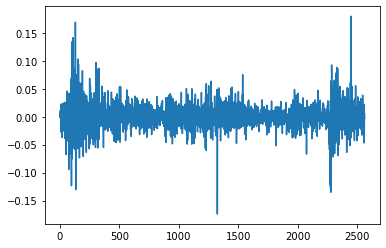

In [255]:
#Is there outliers in the ABBN.S security
df_index_analysis1['BNPP.PA'].plot()

In [256]:
#OLS analysis
y = df_index_analysis1['.STOXX50'][1:]  #we are excluding the first line of the returns because it is empty (pct.change)
x = df_index_analysis1[ 'BNPP.PA'][1:]
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results1 = model.fit(cov_type='HC0') #HC0 method is robust for Heteroskedasticity
print(results1.summary())



                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.523
Model:                            OLS   Adj. R-squared:                  0.523
Method:                 Least Squares   F-statistic:                     701.9
Date:                Sat, 08 May 2021   Prob (F-statistic):          7.00e-137
Time:                        19:35:41   Log-Likelihood:                 8961.0
No. Observations:                2561   AIC:                        -1.792e+04
Df Residuals:                    2559   BIC:                        -1.791e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const       7.006e-05      0.000      0.483      0.6

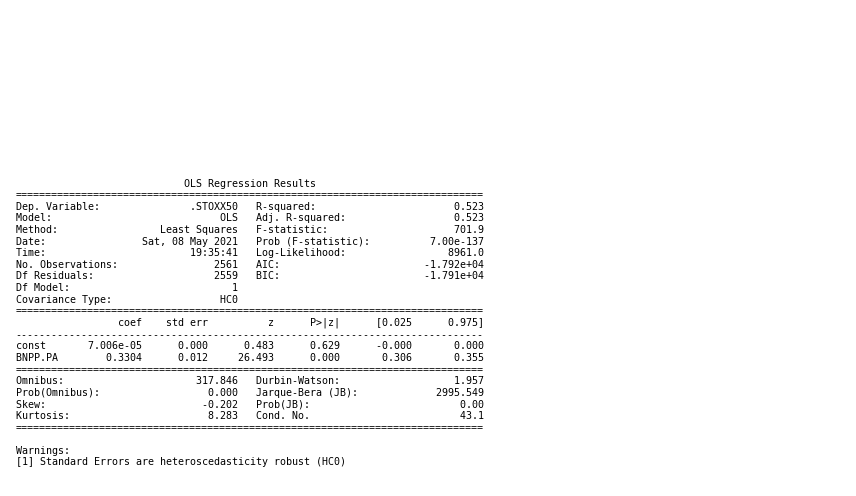

In [257]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results1.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_OLS_BNPP.PA.png')

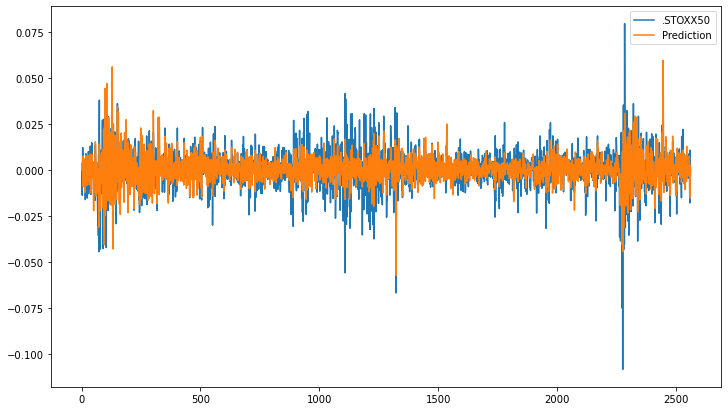

In [258]:
regression1 = pd.DataFrame(y)



prediction = results1.predict()



regression1['Prediction']=prediction
regression1.plot()

In [259]:
regression1['Diff']=regression1['Prediction']-regression1['.STOXX50']
regression1

.STOXX50  Prediction      Diff
1    -0.000331   -0.000177  0.000153
2    -0.003349    0.000441  0.003790
3    -0.013856    0.003779  0.017635
4    -0.002356   -0.000358  0.001998
5     0.012094    0.002825 -0.009269
...        ...         ...       ...
2557 -0.001507    0.002756  0.004263
2558 -0.018039   -0.015420  0.002619
2559  0.010643   -0.002985 -0.013629
2560  0.006341    0.002170 -0.004171
2561 -0.003240   -0.001038  0.002201

[2561 rows x 3 columns]

In [260]:
regression1['Diff'].mean()

-1.5714792910059322e-19

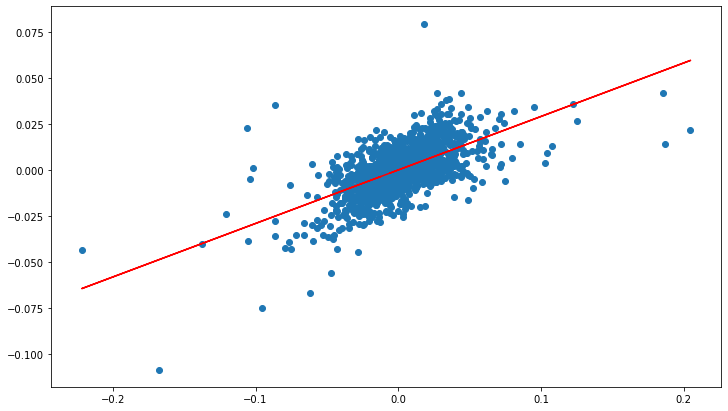

In [261]:
#scatter plot vs prediction
from sklearn.linear_model import LinearRegression
X=df_index_analysis1.iloc[1:,10].values.reshape(-1,1) #creates an array
Y=df_index_analysis1.iloc[1:,0].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()


In [262]:
df_index_analysis1['BNPP.PA'][(df_index_analysis1['BNPP.PA']>=0.10)|(df_index_analysis1['BNPP.PA']<=-0.10)]

96     -0.123490
99      0.133829
107     0.141500
129     0.169246
132    -0.130594
151     0.103288
1323   -0.174004
2273   -0.122809
2276   -0.130679
2278   -0.135203
2446    0.179807
Name: BNPP.PA, dtype: float64

In [263]:
df_index_analysis['BNPP.PA'][(df_index_analysis['BNPP.PA']>=0.10)|(df_index_analysis['BNPP.PA']<=-0.10)].index

Int64Index([96, 99, 107, 129, 132, 151, 1323, 2273, 2276, 2278, 2446], dtype='int64')

In [264]:
df_trial=df_index_analysis1.drop(df_index_analysis1.index[[96, 99, 107, 129, 132, 151, 1323, 2273, 2276, 2278, 2446]],axis=0)


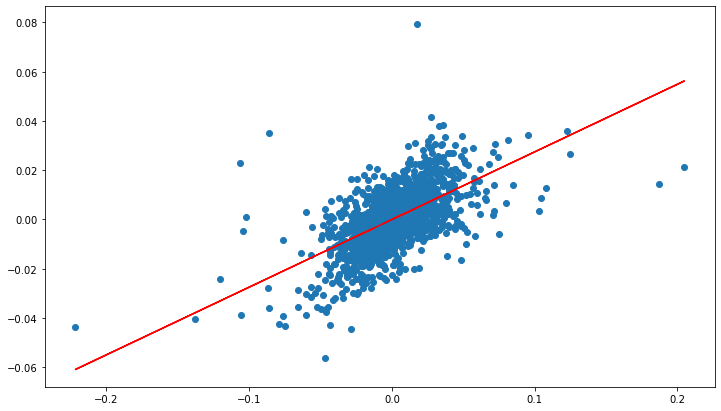

In [265]:
from sklearn.linear_model import LinearRegression
X=df_trial.iloc[1:,10].values.reshape(-1,1) #creates an array
Y=df_trial.iloc[1:,0].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()


#

In [266]:
y = df_trial['.STOXX50'][1:]
x = df_trial[ 'BNPP.PA'][1:]
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results2 = model.fit(cov_type='HC0')
print(results2.summary())


                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.495
Model:                            OLS   Adj. R-squared:                  0.495
Method:                 Least Squares   F-statistic:                     949.0
Date:                Sat, 08 May 2021   Prob (F-statistic):          2.02e-177
Time:                        19:35:44   Log-Likelihood:                 8990.0
No. Observations:                2550   AIC:                        -1.798e+04
Df Residuals:                    2548   BIC:                        -1.796e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0001      0.000      0.882      0.3

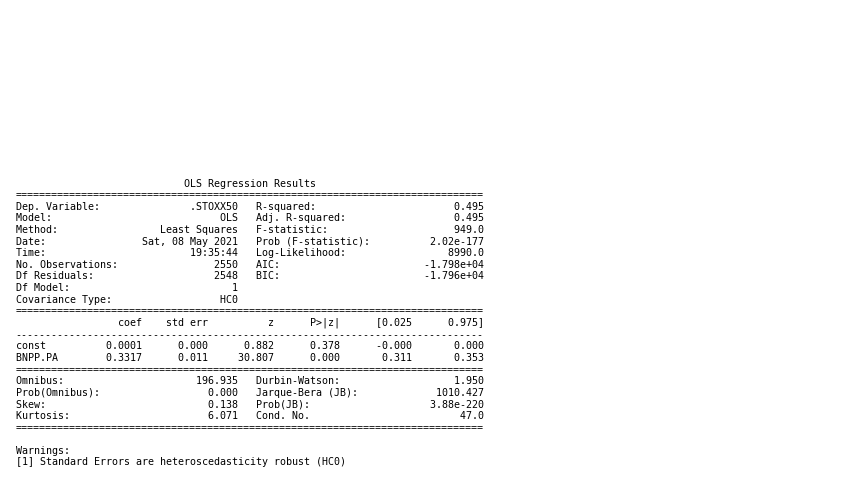

In [267]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results2.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_OLS(w.o. outliers)_BNPP.PA.png')

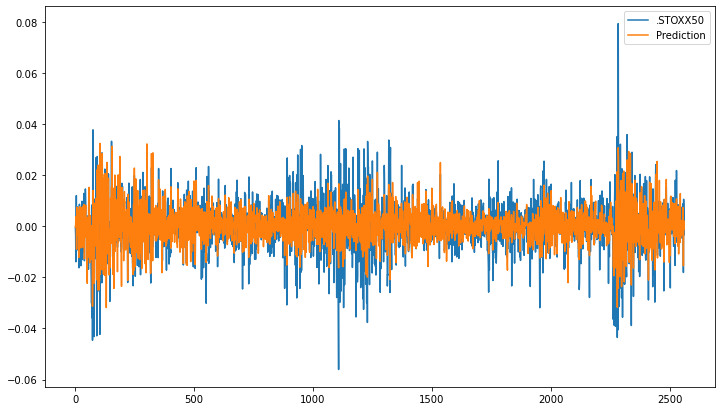

In [268]:
regression2 = pd.DataFrame(y)

prediction = results2.predict()



regression2['Prediction']=prediction
regression2.plot()

# Airbus

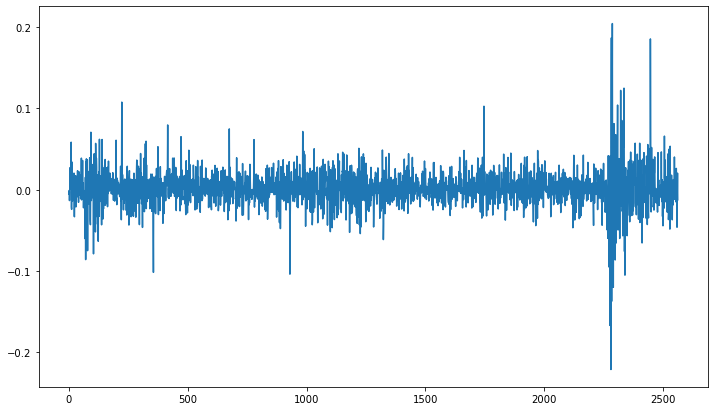

In [269]:
#Is there outliers in the ABBN.S security
df_index_analysis1['AIR.PA'].plot()

In [270]:
#OLS
y = df_index_analysis1['.STOXX50'][1:]
x = df_index_analysis1[ 'AIR.PA'][1:]
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results3 = model.fit(cov_type='HC0')
print(results3.summary())


                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.383
Model:                            OLS   Adj. R-squared:                  0.383
Method:                 Least Squares   F-statistic:                     290.4
Date:                Sat, 08 May 2021   Prob (F-statistic):           9.27e-62
Time:                        19:35:45   Log-Likelihood:                 8631.8
No. Observations:                2561   AIC:                        -1.726e+04
Df Residuals:                    2559   BIC:                        -1.725e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.861e-05      0.000     -0.592      0.5

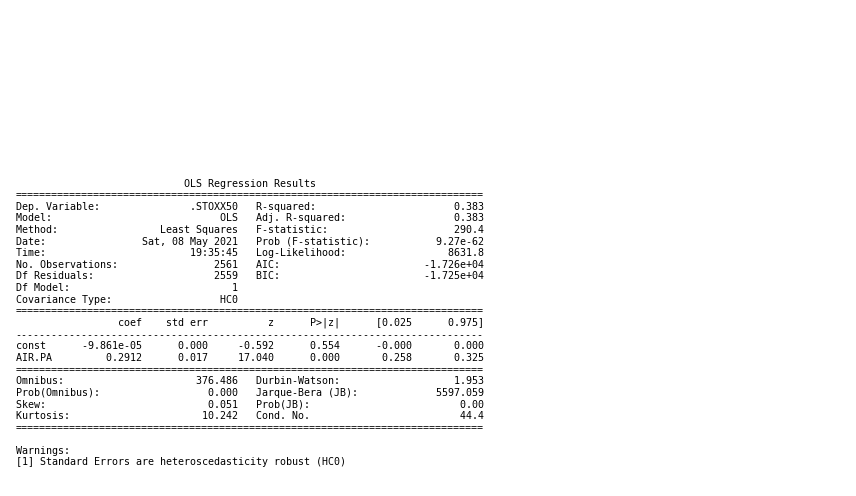

In [271]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results3.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_OLS_AIR.PA.png')

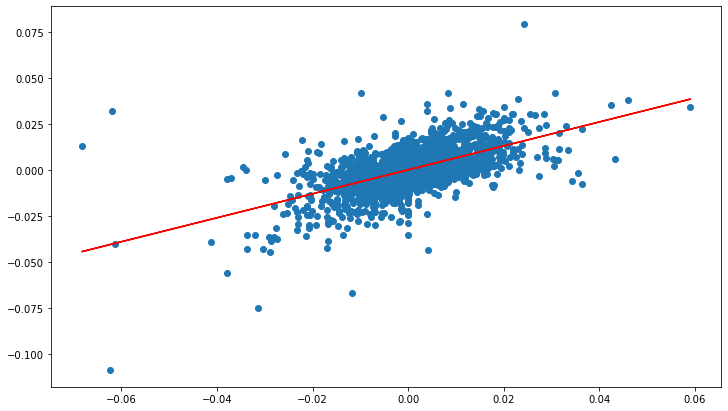

In [272]:
#scatter plot vs prediction
from sklearn.linear_model import LinearRegression
X=df_index_analysis1.iloc[1:,11].values.reshape(-1,1) #creates an array
Y=df_index_analysis1.iloc[1:,0].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()


In [273]:
df_index_analysis1['AIR.PA'][(df_index_analysis1['AIR.PA']>=0.10)|(df_index_analysis1['AIR.PA']<=-0.10)]

df_index_analysis['AIR.PA'][(df_index_analysis['AIR.PA']>=0.10)|(df_index_analysis['AIR.PA']<=-0.10)].index

Int64Index([ 223,  356,  930, 1746, 2276, 2280, 2282, 2283, 2286, 2288, 2290,
            2308, 2321, 2335, 2339, 2446],
           dtype='int64')

In [274]:
df_trial=df_index_analysis1.drop(df_index_analysis1.index[[223,  356,  930, 1746, 2276, 2280, 2282, 2283, 2286, 2288, 2290,
            2308, 2321, 2335, 2339, 2446]],axis=0)

                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.386
Model:                            OLS   Adj. R-squared:                  0.385
Method:                 Least Squares   F-statistic:                     560.7
Date:                Sat, 08 May 2021   Prob (F-statistic):          3.52e-112
Time:                        19:35:47   Log-Likelihood:                 8679.2
No. Observations:                2545   AIC:                        -1.735e+04
Df Residuals:                    2543   BIC:                        -1.734e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.026e-05      0.000     -0.565      0.5

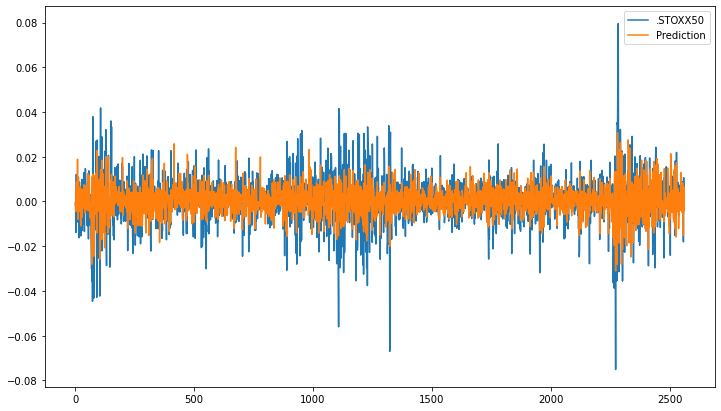

In [275]:
#OLS without ouliers
y = df_trial['.STOXX50'][1:]
x = df_trial[ 'AIR.PA'][1:]
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results4 = model.fit(cov_type='HC0')
print(results4.summary())




regression4= pd.DataFrame(y)



prediction = results4.predict()



regression4['Prediction']=prediction
regression4.plot()



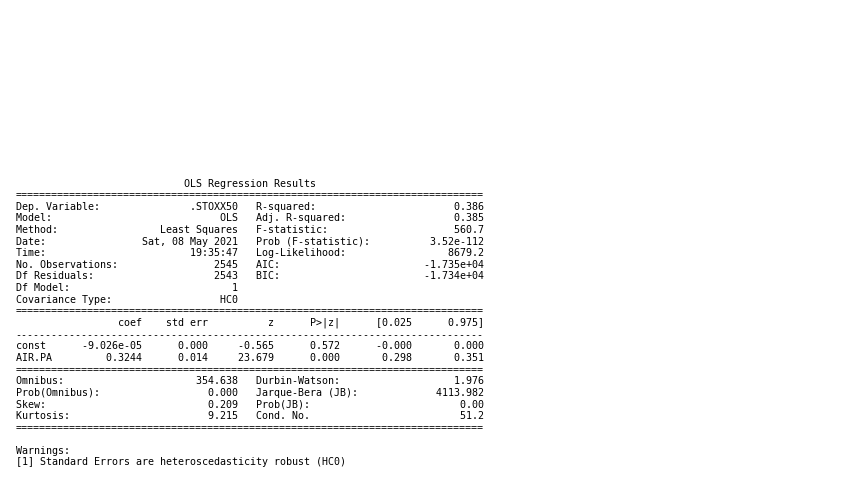

In [276]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results4.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_OLS(w.o. outliers)_AIR.PA.png')

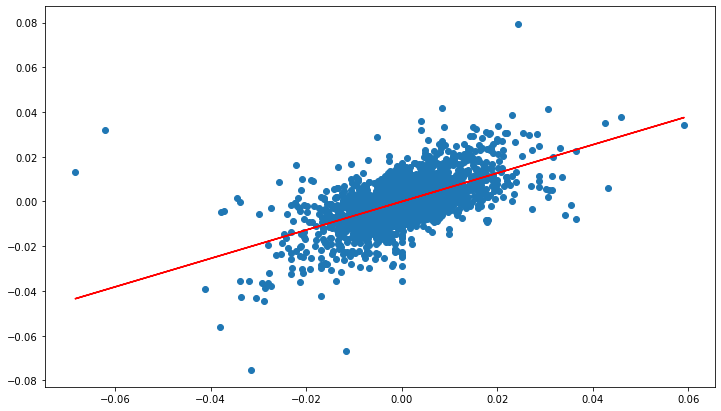

.STOXX50       BHPB.L       ABBN.S     ADSGn.DE     BAYGn.DE  \
count  2545.000000  2545.000000  2545.000000  2545.000000  2545.000000   
mean      0.000181     0.000247     0.000246     0.000808     0.000158   
std       0.010199     0.021035     0.014242     0.017136     0.017609   
min      -0.075136    -0.165741    -0.089848    -0.153704    -0.130745   
25%      -0.004602    -0.011054    -0.006682    -0.008237    -0.009019   
50%       0.000303     0.000000     0.000000     0.000000     0.000000   
75%       0.005312     0.011526     0.007481     0.009673     0.009617   
max       0.079521     0.165129     0.110218     0.111834     0.087368   

           SGEF.PA        GSK.L       HSBA.L       ULVR.L      BNPP.PA  ...  \
count  2545.000000  2545.000000  2545.000000  2545.000000  2545.000000  ...   
mean      0.000427     0.000140    -0.000042     0.000399     0.000266  ...   
std       0.016220     0.011860     0.014374     0.012121     0.022460  ...   
min      -0.123776    -0.076221    -0.065685    -0.071591    -0.174004  ...   
25%      -0.007917    -0.006499    -0.007084    -0.006130    -0.010479  ...   
50%       0.000180     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.008314     0.006711     0.007262     0.006879     0.010947  ...   
max       0.101817     0.071643     0.099181     0.134279     0.169246  ...   

             RIO.L     DAIGn.DE         BP.L      PRTP.PA      ALVG.DE  \
count  2545.000000  2545.000000  2545.000000  2545.000000  2545.000000   
mean      0.000388     0.000353    -0.000062     0.000858     0.000401   
std       0.020367     0.019246     0.017111     0.017682     0.015807   
min      -0.107996    -0.134395    -0.194838    -0.096231    -0.103887   
25%      -0.010485    -0.008468    -0.008299    -0.008484    -0.006721   
50%       0.000319     0.000000     0.000000     0.000349     0.000317   
75%       0.011411     0.009605     0.007564     0.009946     0.007603   
max       0.146935     0.272767     0.215843     0.105954     0.158039   

            SAF.PA      ENEI.MI      AXAF.PA       ABI.BR        RKT.L  
count  2545.000000  2545.000000  2545.000000  2545.000000  2545.000000  
mean      0.000871     0.000438     0.000396     0.000223     0.000382  
std       0.018564     0.016888     0.019733     0.015989     0.012532  
min      -0.115567    -0.100450    -0.154812    -0.111939    -0.075061  
25%      -0.007834    -0.008528    -0.008266    -0.007618    -0.006985  
50%       0.000315     0.000000     0.000718     0.000135     0.000000  
75%       0.009683     0.009749     0.009062     0.008000     0.007373  
max       0.209327     0.075201     0.175640     0.128996     0.080943  

[8 rows x 48 columns]

In [277]:
#scatter plot vs prediction
from sklearn.linear_model import LinearRegression
X=df_trial.iloc[1:,11].values.reshape(-1,1) #creates an array
Y=df_trial.iloc[1:,0].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

df_index_analysis1.describe()
df_trial.describe()

# SAPG.DE

                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.456
Model:                            OLS   Adj. R-squared:                  0.456
Method:                 Least Squares   F-statistic:                     135.1
Date:                Sat, 08 May 2021   Prob (F-statistic):           1.80e-30
Time:                        19:35:49   Log-Likelihood:                 8791.9
No. Observations:                2561   AIC:                        -1.758e+04
Df Residuals:                    2559   BIC:                        -1.757e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const      -9.148e-05      0.000     -0.573      0.5

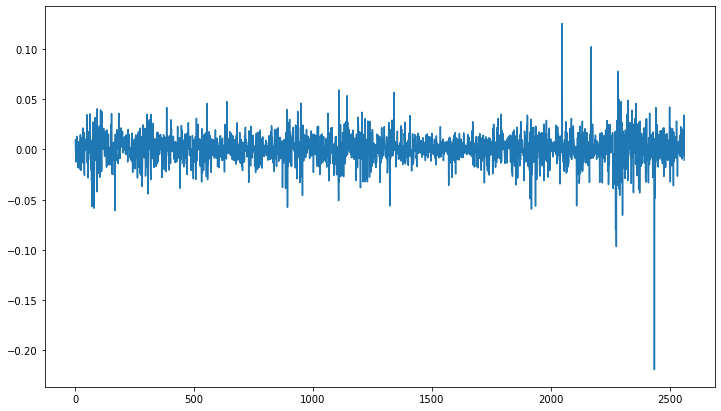

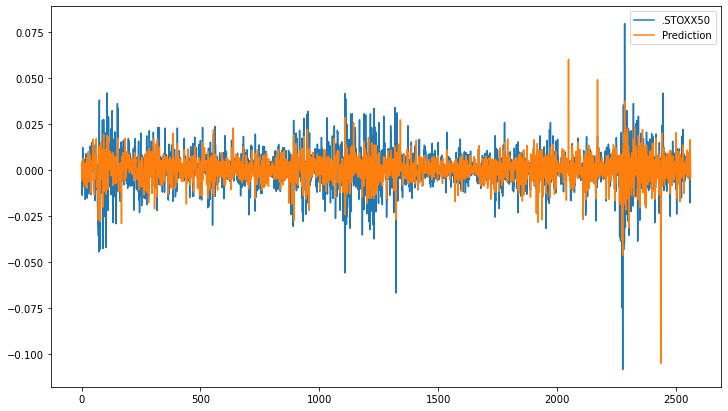

In [278]:
#is there any outliers? 
df_index_analysis1['SAPG.DE'].plot()



#OLS
y = df_index_analysis1['.STOXX50'][1:]
x = df_index_analysis1[ 'SAPG.DE'][1:]
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results5 = model.fit(cov_type='HC0')
print(results5.summary())


regression5= pd.DataFrame(y)



prediction = results5.predict()



regression5['Prediction']=prediction
regression5.plot()






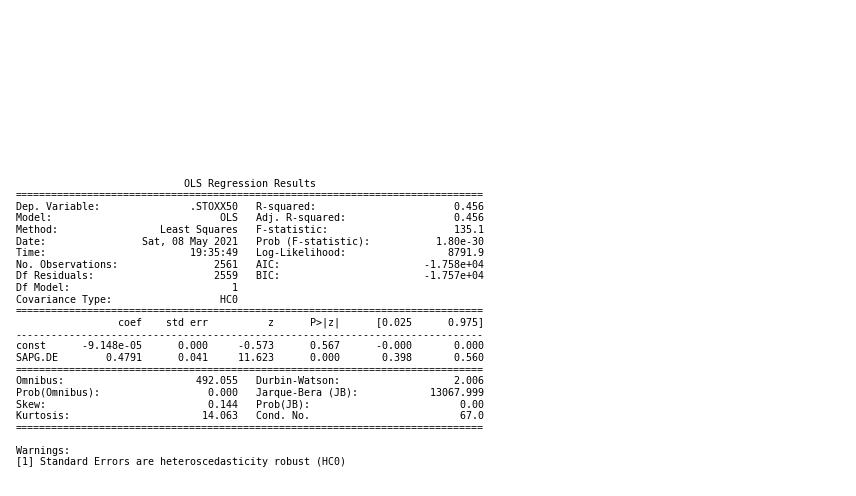

In [279]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results5.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_OLS_SAPG.DE.png')

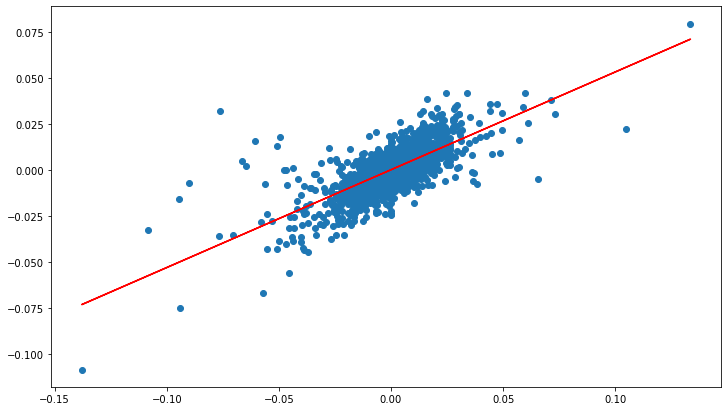

Int64Index([2048, 2170, 2436], dtype='int64')

In [280]:
#scatter plot vs prediction
from sklearn.linear_model import LinearRegression
X=df_index_analysis1.iloc[1:,33].values.reshape(-1,1) #creates an array
Y=df_index_analysis1.iloc[1:,0].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

df_index_analysis['SAPG.DE'][(df_index_analysis['SAPG.DE']>=0.10)|(df_index_analysis['SAPG.DE']<=-0.10)].index


                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     602.6
Date:                Sat, 08 May 2021   Prob (F-statistic):          1.16e-119
Time:                        19:35:50   Log-Likelihood:                 8897.9
No. Observations:                2558   AIC:                        -1.779e+04
Df Residuals:                    2556   BIC:                        -1.778e+04
Df Model:                           1                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0001      0.000     -0.801      0.4

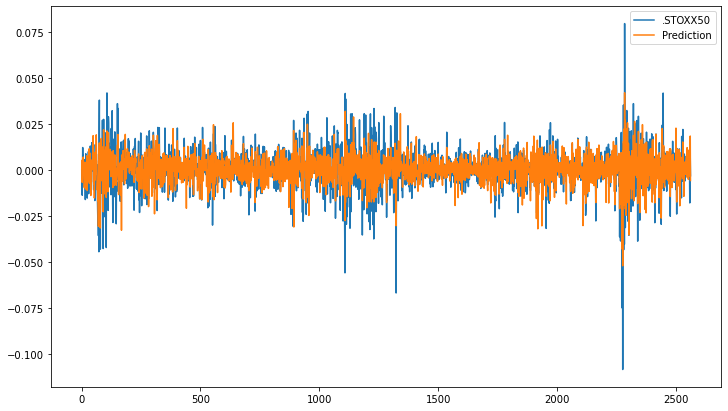

In [281]:
df_trial=df_index_analysis1.drop(df_index_analysis1.index[[2048, 2170, 2436]],axis=0)
#OLS without ouliers
y = df_trial['.STOXX50'][1:]
x = df_trial[ 'SAPG.DE'][1:]
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results6 = model.fit(cov_type='HC0')
print(results6.summary())


regression6= pd.DataFrame(y)



prediction = results6.predict()



regression6['Prediction']=prediction
regression6.plot()



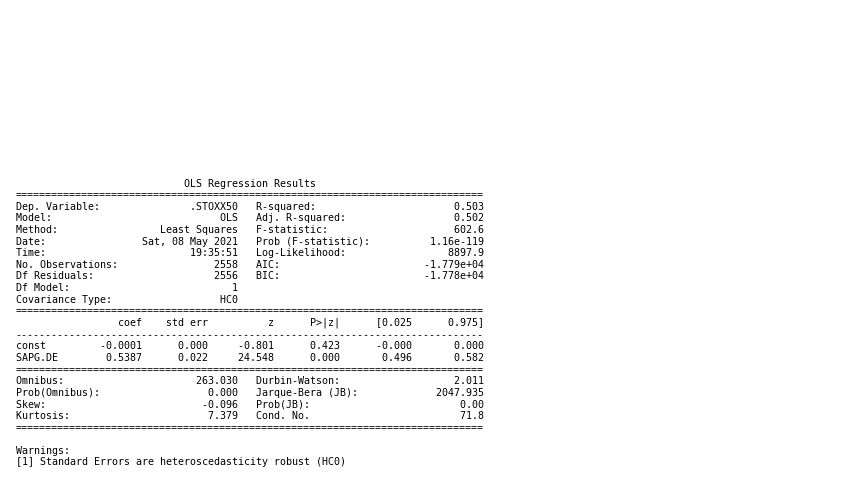

In [282]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results6.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_OLS(w.o. outliers)_SAPG.DE.png')

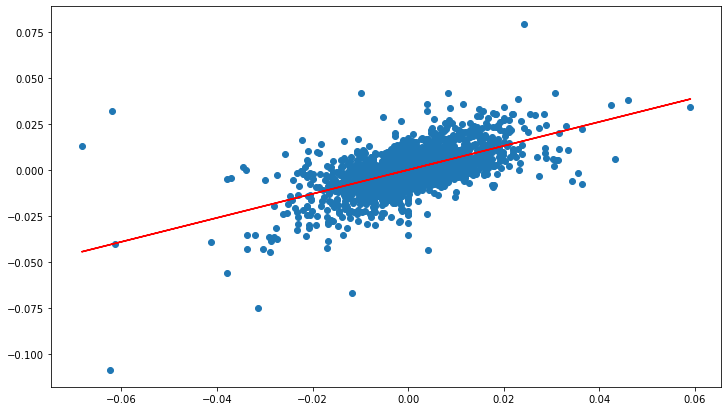

.STOXX50       BHPB.L       ABBN.S     ADSGn.DE     BAYGn.DE  \
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000   
mean      0.000152     0.000238     0.000192     0.000816     0.000140   
std       0.010587     0.021413     0.014711     0.017634     0.018030   
min      -0.108652    -0.165741    -0.121161    -0.153704    -0.140271   
25%      -0.004637    -0.011114    -0.006761    -0.008275    -0.009032   
50%       0.000329     0.000000     0.000000     0.000000     0.000000   
75%       0.005375     0.011633     0.007512     0.009752     0.009627   
max       0.079521     0.165129     0.110218     0.111834     0.087368   

           SGEF.PA        GSK.L       HSBA.L       ULVR.L      BNPP.PA  ...  \
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000  ...   
mean      0.000410     0.000098    -0.000070     0.000373     0.000243  ...   
std       0.017541     0.012041     0.014839     0.012231     0.023177  ...   
min      -0.170744    -0.077499    -0.095212    -0.071591    -0.174004  ...   
25%      -0.007946    -0.006503    -0.007113    -0.006128    -0.010508  ...   
50%       0.000212     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.008384     0.006780     0.007262     0.006897     0.011015  ...   
max       0.188469     0.071643     0.107164     0.134279     0.179807  ...   

             RIO.L     DAIGn.DE         BP.L      PRTP.PA      ALVG.DE  \
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000   
mean      0.000380     0.000330     0.000010     0.000854     0.000414   
std       0.020590     0.020057     0.017906     0.018209     0.016491   
min      -0.117848    -0.188521    -0.194838    -0.123147    -0.153277   
25%      -0.010511    -0.008456    -0.008290    -0.008544    -0.006715   
50%       0.000328     0.000000     0.000000     0.000350     0.000335   
75%       0.011435     0.009721     0.007690     0.010001     0.007674   
max       0.146935     0.272767     0.215843     0.105954     0.158039   

            SAF.PA      ENEI.MI      AXAF.PA       ABI.BR        RKT.L  
count  2558.000000  2558.000000  2558.000000  2558.000000  2558.000000  
mean      0.000821     0.000389     0.000367     0.000271     0.000349  
std       0.020696     0.017431     0.020259     0.016976     0.012735  
min      -0.228737    -0.198466    -0.154812    -0.166083    -0.075061  
25%      -0.007880    -0.008524    -0.008325    -0.007645    -0.007021  
50%       0.000312     0.000000     0.000707     0.000144     0.000000  
75%       0.009725     0.009820     0.009118     0.008101     0.007380  
max       0.209327     0.075201     0.175640     0.144001     0.080943  

[8 rows x 48 columns]

In [283]:
#scatter plot vs prediction
from sklearn.linear_model import LinearRegression
X=df_trial.iloc[1:,11].values.reshape(-1,1) #creates an array
Y=df_trial.iloc[1:,0].values.reshape(-1,1)

lr=LinearRegression()
lr.fit(X,Y)
Y_pred=lr.predict(X)
plt.scatter(X,Y)
plt.plot(X,Y_pred,color='red')
plt.show()

df_index_analysis1.describe()
df_trial.describe()

# Analysis

# MULTIPLE OLS

In [284]:
def OLS(y,x):

    #if const is not None: x['const']=1
        
    #Beta estimates [(X'X)^-1]X'Y
    x_xt= np.dot(x.T,x)        # multiply vector X with transposed vector X'
    x_x_inv= np.linalg.inv(x_xt)   # invert the matrix

    x_y= np.dot(x.T,y)              # multiply transposed vector X' with Y
    est_betas=  np.dot(x_x_inv,x_y) # multiply (X'X)^-1 with X'Y
    est_Y= np.dot(est_betas,x.T)    # multiply est_betas with X'
        
    nb_obs=x.shape[0]  
    rank=x.shape[1] #equals p = number of regressors 
    deg_freedom_residual=nb_obs-rank
    
    #Y estimate
    est_y = np.dot(x,est_betas)
    est_resid = y-est_y
    
    est_resid_2 = np.dot(est_resid.T,est_resid)
    
    est_sigma_2= est_resid_2 / nb_obs
    
    est_var_covar_beta = np.dot(x_x_inv,est_sigma_2)  #Variance-Covariance Matrix of Betas
        #var_beta_est = np.kron(x_x_inv,est_sigma_2) #???
    
    est_var_beta = np.diag(est_var_covar_beta)
    est_sd_beta=np.sqrt(est_var_beta)    # standard errors
    t_stats= est_betas/est_sd_beta       # t-stats
    pvals = stats.t.sf(np.abs(t_stats), nb_obs-1)*2
  
    SST=np.var(y)*nb_obs
    SSR=est_resid_2
    R_2=1-(SSR/SST)
    
    llf = (-0.5*nb_obs * np.log(2 * np.pi*est_sigma_2)) -(0.5*nb_obs*(1/np.log(est_sigma_2))*est_resid_2)
    
    OLS_results = {
        'Y': y,
        'est_Y': est_Y,
        'X': x,
        'est_betas': est_betas,
        'est_resid': est_resid,
        'nb_obs': nb_obs,
        'deg_freedom_residual': deg_freedom_residual,
        'est_sigma_2': est_sigma_2,
        'est_var_covar_beta': est_var_covar_beta,
        't_stats': t_stats,
        'pvals': pvals,
        'llf': llf,
        'nb_parms': rank,
        'R_2': R_2
    }
                                                          
    return OLS_results

# Test for Prediction's validity

In [285]:
y = df_index_analysis1['.STOXX50'].dropna()
x = df_index_analysis1[['BHPB.L', 'ABBN.S', 'ADSGn.DE', 'BAYGn.DE',
       'SGEF.PA', 'GSK.L', 'HSBA.L', 'ULVR.L', 'BNPP.PA', 'AIR.PA',
       'NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'LVMH.PA', 'ASML.AS',
       'SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'DGE.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L', 'OREP.PA',
       'SIEGn.DE', 'SAPG.DE', 'ZURN.S', 'SCHN.PA', 'BASFn.DE', 'NG.L',
       'DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'BP.L', 'PRTP.PA', 'ALVG.DE',
       'SAF.PA', 'ENEI.MI', 'AXAF.PA', 'ABI.BR', 'RKT.L']].dropna()
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results = model.fit(cov_type='HC0')
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.948
Model:                            OLS   Adj. R-squared:                  0.947
Method:                 Least Squares   F-statistic:                     746.9
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        19:35:52   Log-Likelihood:                 11789.
No. Observations:                2561   AIC:                        -2.348e+04
Df Residuals:                    2513   BIC:                        -2.320e+04
Df Model:                          47                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002   4.86e-05     -3.578      0.0

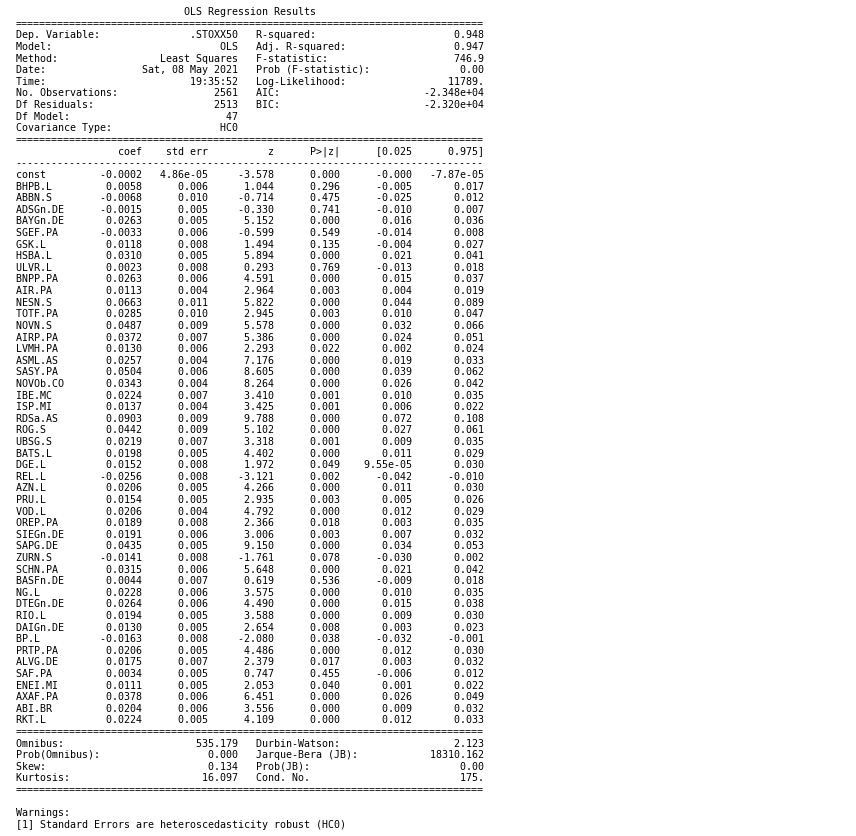

In [286]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_multiple_OLS.png')

In [287]:
regression7 = pd.DataFrame(y)



prediction = results.predict()



regression7['Prediction']=prediction
regression7

.STOXX50  Prediction
1    -0.000331    0.001535
2    -0.003349   -0.001197
3    -0.013856   -0.011502
4    -0.002356   -0.002630
5     0.012094    0.010564
...        ...         ...
2557 -0.001507   -0.000588
2558 -0.018039   -0.017231
2559  0.010643    0.009631
2560  0.006341    0.006075
2561 -0.003240   -0.004313

[2561 rows x 2 columns]

In [288]:
regression7['Diff']=regression7['.STOXX50']-regression7['Prediction']
regression7['Diff'].mean()

-1.9655006287551352e-17

<function matplotlib.pyplot.show(*args, **kw)>

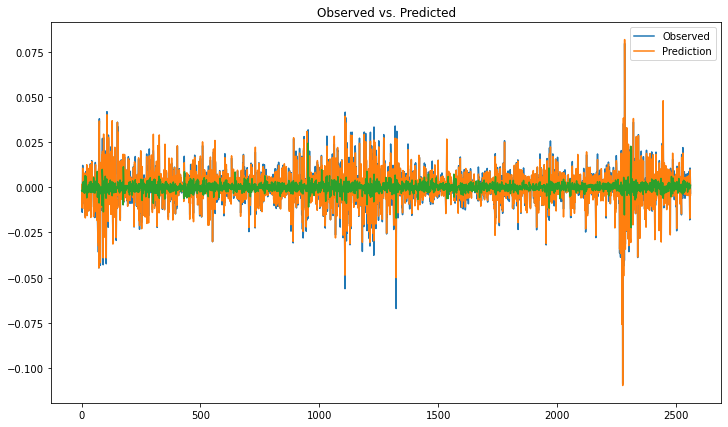

In [289]:
plt.plot(regression7)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('Observed vs. Predicted')
plt.show

In [290]:
#Let's drop the inisgnificant securities from the original set
y = df_index_analysis1['.STOXX50'].dropna() #we drop the first row of the return dataset as it contains NaN (pct.change)
x = df_index_analysis1[[ 'BAYGn.DE', 'HSBA.L',  'BNPP.PA', 'AIR.PA','NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'ASML.AS','SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L',
       'SIEGn.DE', 'SAPG.DE', 'SCHN.PA', 'NG.L',
       'DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'PRTP.PA',
       'AXAF.PA', 'ABI.BR', 'RKT.L']].dropna()
x = sm.add_constant(x)
model = sm.OLS(y,x) 
results2 = model.fit(cov_type='HC0')  #controls for Heteroskedasticity
print(results2.summary())

                            OLS Regression Results                            
Dep. Variable:               .STOXX50   R-squared:                       0.946
Model:                            OLS   Adj. R-squared:                  0.946
Method:                 Least Squares   F-statistic:                     1041.
Date:                Sat, 08 May 2021   Prob (F-statistic):               0.00
Time:                        19:35:54   Log-Likelihood:                 11755.
No. Observations:                2561   AIC:                        -2.344e+04
Df Residuals:                    2528   BIC:                        -2.325e+04
Df Model:                          32                                         
Covariance Type:                  HC0                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
const         -0.0002   4.92e-05     -3.348      0.0

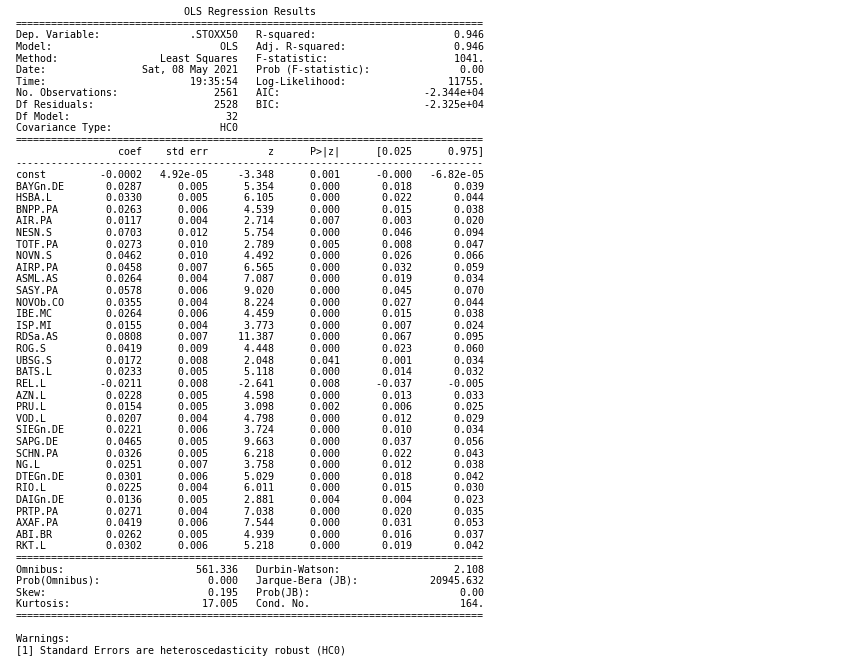

In [291]:
#Save the regression tab
import matplotlib.pyplot as plt
plt.rc('figure', figsize=(12, 7))
#plt.text(0.01, 0.05, str(model.summary()), {'fontsize': 12}) old approach
plt.text(0.01, 0.05, str(results2.summary()), {'fontsize': 10}, fontproperties = 'monospace') # approach improved by OP -> monospace!
plt.axis('off')
plt.tight_layout()
plt.savefig('output_multiple(w.o. insignificant variables)_OLS.png')

In [292]:
regression8 = pd.DataFrame(y)



prediction = results2.predict()



regression8['Prediction']=prediction
regression8

.STOXX50  Prediction
1    -0.000331    0.001694
2    -0.003349   -0.001383
3    -0.013856   -0.011202
4    -0.002356   -0.002832
5     0.012094    0.010731
...        ...         ...
2557 -0.001507   -0.000196
2558 -0.018039   -0.017493
2559  0.010643    0.009707
2560  0.006341    0.005388
2561 -0.003240   -0.004358

[2561 rows x 2 columns]

In [293]:
regression8['Diff']=regression8['.STOXX50']-regression8['Prediction']
regression8['Diff'].mean()

-4.517703229061767e-16

<function matplotlib.pyplot.show(*args, **kw)>

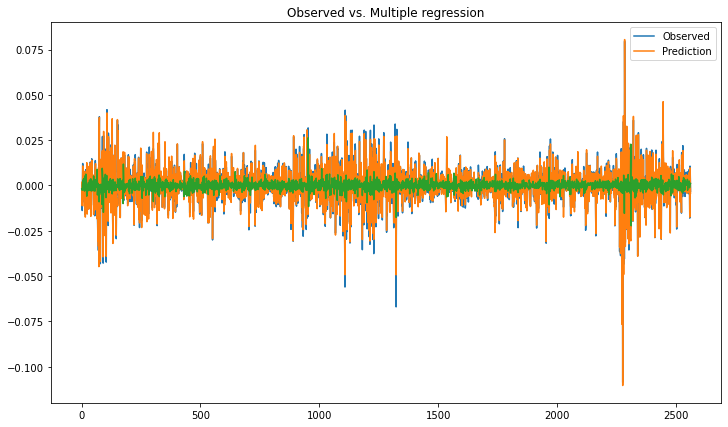

In [294]:
plt.plot(regression8)
labels=['Observed','Prediction']
plt.legend(labels)
plt.title('Observed vs. Multiple regression')
plt.show

# Heteroskedasticity

<function matplotlib.pyplot.show(*args, **kw)>

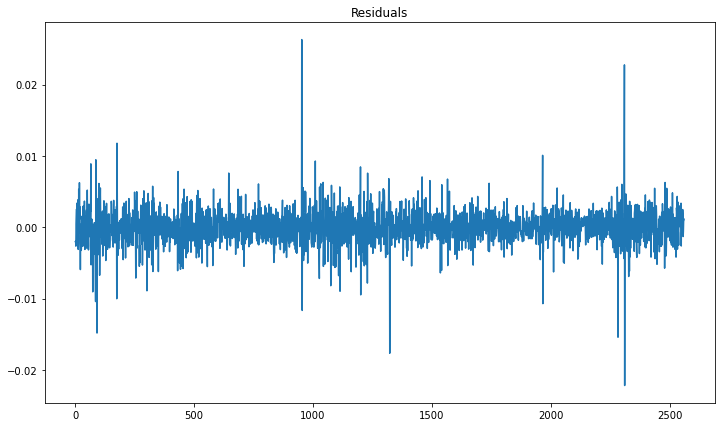

In [295]:
Residuals=df_index_analysis1['.STOXX50'].dropna()-prediction
plt.plot(Residuals)
plt.title('Residuals')
plt.show

#It is not perfectly clear whether our residuals show heteroskedasticity. There is no real pattern. If there is heteroskedasticity, we should observe a Fan-shaped figure, which would mean that errors will be growing systematically over time underpinned by omitted variable in the time series.
#Since using the HCO method in our regression did not change the significance of our model, this additional finding confirms our hypothesis that our dataset presents homoskedasticity.

In [296]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [297]:
#Breusch-Pagan test
name = ['Lagrange multiplier statistic', 'p-value',
        'f-value', 'f p-value']
test = sms.het_breuschpagan(results2.resid, results2.model.exog)
lzip(name, test)

[('Lagrange multiplier statistic', 162.52732789380633),
 ('p-value', 2.122154484567639e-19),
 ('f-value', 5.353264622496483),
 ('f p-value', 3.78998887930895e-20)]

# Autocorrelation

In [298]:
dw_pvalue1=sm.stats.stattools.durbin_watson(Residuals)
print("\n","Durbin Watson Test Statistics", dw_pvalue1)


 Durbin Watson Test Statistics 2.1082569201685506


# Correlation

In [299]:
corr=df_index_analysis[['BNPP.PA','AIR.PA','SAPG.DE']].corr()
corr

BNPP.PA    AIR.PA   SAPG.DE
BNPP.PA  1.000000  0.518419  0.443763
AIR.PA   0.518419  1.000000  0.450535
SAPG.DE  0.443763  0.450535  1.000000

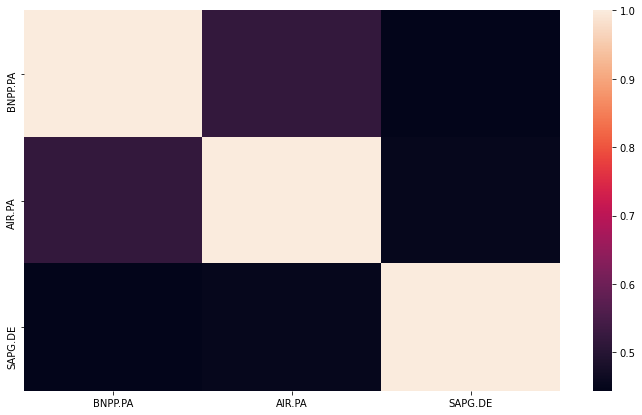

In [300]:
#Heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)

# Multicolinearity test

In [301]:
def vif_cal(input_data, dependent_col):
    x_vars=input_data.drop([dependent_col], axis=1)
    xvar_names=x_vars.columns
    for i in range(0,xvar_names.shape[0]):
        y=x_vars[xvar_names[i]] 
        x=x_vars[xvar_names.drop(xvar_names[i])]
        rsq=sm.OLS(formula="y~x", data=x_vars,endog=y, exog=x).fit().rsquared  
        vif=round(1/(1-rsq),2)
        print (xvar_names[i], " VIF = " , vif)

In [302]:
#Calculating VIF values using that function
vif_cal(input_data=df_index_analysis1[['.STOXX50','BAYGn.DE', 'HSBA.L',  'BNPP.PA', 'AIR.PA','NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'ASML.AS','SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L',
       'SIEGn.DE', 'SAPG.DE', 'SCHN.PA', 'NG.L',
       'DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'PRTP.PA',
       'AXAF.PA', 'ABI.BR', 'RKT.L']].dropna(), dependent_col='.STOXX50')

BAYGn.DE  VIF =  2.24
HSBA.L  VIF =  2.15
BNPP.PA  VIF =  4.26
AIR.PA  VIF =  1.96
NESN.S  VIF =  2.13
TOTF.PA  VIF =  4.41
NOVN.S  VIF =  2.6
AIRP.PA  VIF =  2.76
ASML.AS  VIF =  1.71
SASY.PA  VIF =  2.21
NOVOb.CO  VIF =  1.37
IBE.MC  VIF =  2.23
ISP.MI  VIF =  3.05
RDSa.AS  VIF =  3.43
ROG.S  VIF =  2.4
UBSG.S  VIF =  2.56
BATS.L  VIF =  1.59
REL.L  VIF =  1.91
AZN.L  VIF =  1.58
PRU.L  VIF =  2.96
VOD.L  VIF =  1.69
SIEGn.DE  VIF =  3.11
SAPG.DE  VIF =  2.0
SCHN.PA  VIF =  3.31
NG.L  VIF =  1.7
DTEGn.DE  VIF =  2.08
RIO.L  VIF =  1.76
DAIGn.DE  VIF =  2.88
PRTP.PA  VIF =  1.92
AXAF.PA  VIF =  4.15
ABI.BR  VIF =  2.02
RKT.L  VIF =  1.6


# Normality tests and QQ plots

Mean: 0.00015164378220846437
Standard deviation: 0.010593661120163755
Trading days: 2561
Mean: 0.0002298414723858924
Standard deviation: 0.021407494427934198
Trading days: 2561
Mean: 0.00019704179638266062
Standard deviation: 0.01470710914647883
Trading days: 2561
Mean: 0.0008064798192859257
Standard deviation: 0.017633191890739724
Trading days: 2561
Mean: 0.00013651257324645677
Standard deviation: 0.018032021609262348
Trading days: 2561
Mean: 0.00041682587657595023
Standard deviation: 0.017555564965505983
Trading days: 2561
Mean: 8.595515177186104e-05
Standard deviation: 0.01204305755911777
Trading days: 2561
Mean: -6.889972573202334e-05
Standard deviation: 0.014834601169795682
Trading days: 2561
Mean: 0.00035869074157899173
Standard deviation: 0.012237736529325922
Trading days: 2561
Mean: 0.0002468882321974965
Standard deviation: 0.0231879618273886
Trading days: 2561
Mean: 0.0008594297010317445
Standard deviation: 0.022524817115938754
Trading days: 2561
Mean: 0.0003259010227675208
St

C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00038372414252628884
Standard deviation: 0.012218990258563517
Trading days: 2561
Mean: 9.18468267967983e-05
Standard deviation: 0.01863252728669086
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00011068776114859801
Standard deviation: 0.014186172482703709
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00046618461885312973
Standard deviation: 0.012661812522481535
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.000578987507626535
Standard deviation: 0.012550923078227263
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00045959921340994774
Standard deviation: 0.014578546351051566
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0005192237559218239
Standard deviation: 0.019771458697317813
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 1.1485278116943444e-05
Standard deviation: 0.014961825512769093
Trading days: 2561
Mean: 0.000632268017801736

C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()



Standard deviation: 0.013234272593534786
Trading days: 2561
Mean: 0.0002619805805858293
Standard deviation: 0.01518697609648344
Trading days: 2561
Mean: 0.0005074561926360939
Standard deviation: 0.01492871879226737
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0002747781374443149
Standard deviation: 0.014266847571479066
Trading days: 2561
Mean: 0.000495577912693801
Standard deviation: 0.018439585289885874
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00014260863815123437
Standard deviation: 0.016536675336401224
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0002210096415894665
Standard deviation: 0.012064286365014916
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00024359486203205405
Standard deviation: 0.014325123957084846
Trading days: 2561
Mean: 0.0003751791875521787
Standard deviation: 0.0205907952825532
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00033514050676485804
Standard deviation: 0.02005785780933458
Trading days: 2561
Mean: -1.5357561978603266e-05
Standard deviation: 0.01791109115031431
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()
C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0008573571819530541
Standard deviation: 0.01820358986705042
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0004138342906683311
Standard deviation: 0.016495809214864772
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0008131720916820965
Standard deviation: 0.02069395553487601
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.000386038625117204
Standard deviation: 0.017421771298243526
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.00037199271029833005
Standard deviation: 0.020266024200381257
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0002644191310903638
Standard deviation: 0.016968618249604987
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


Mean: 0.0003499729169224032
Standard deviation: 0.012734517584519689
Trading days: 2561


C:\Users\User1\anaconda3\lib\site-packages\statsmodels\graphics\utils.py:55: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  fig = plt.figure()


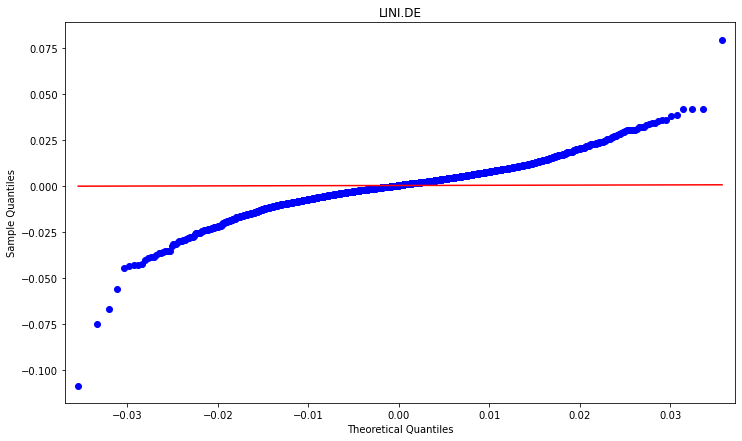

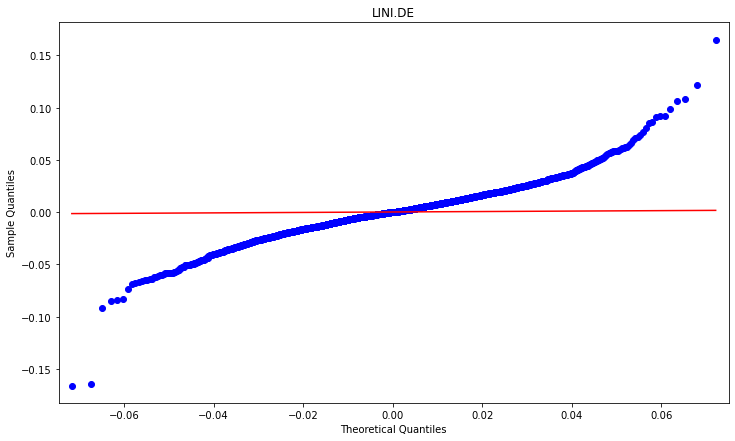

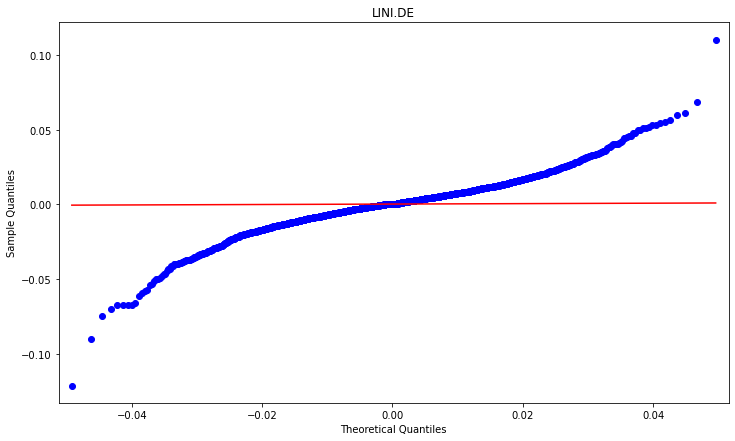

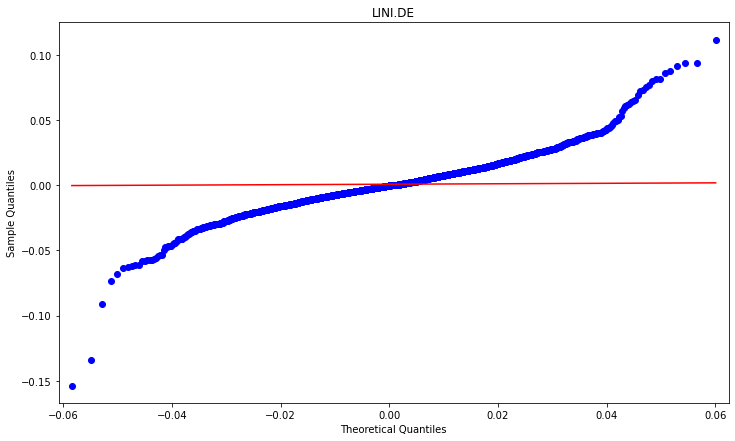

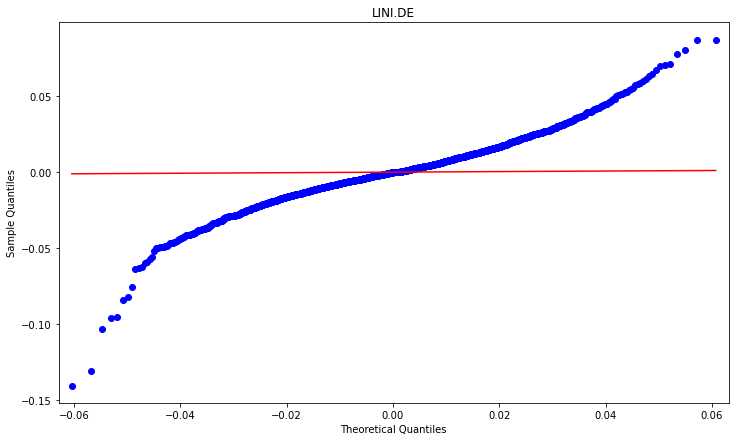

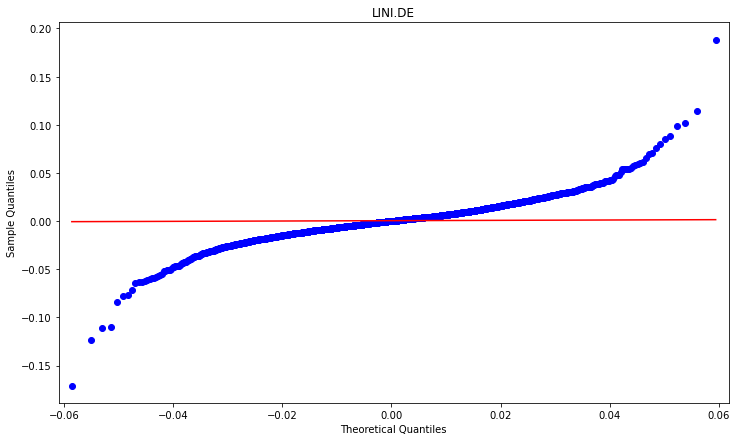

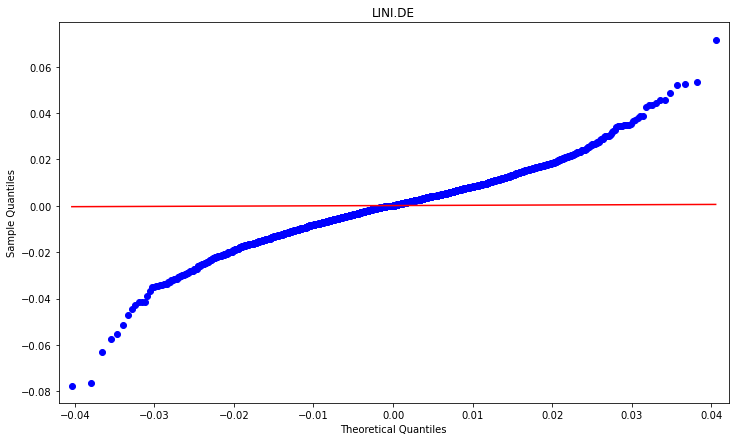

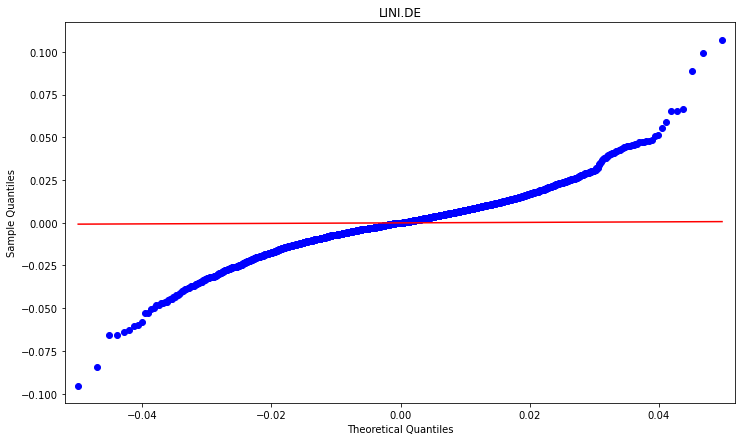

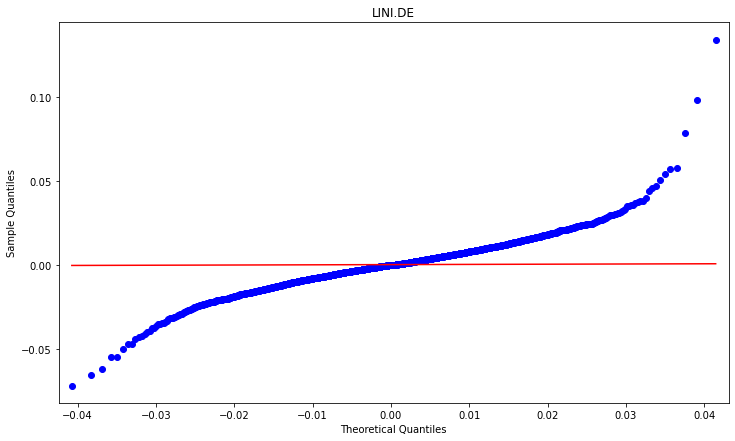

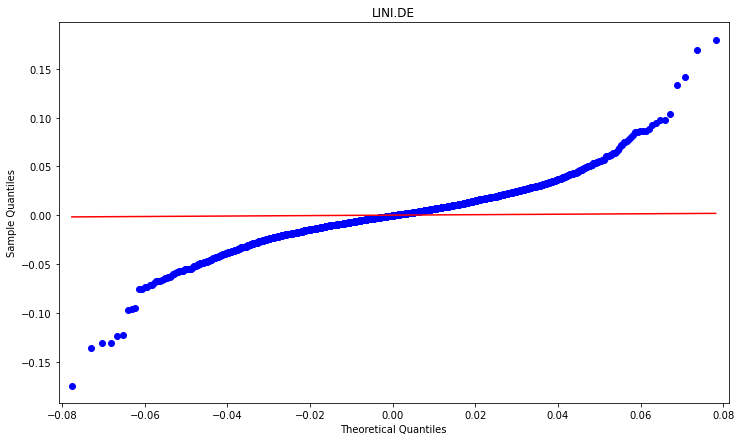

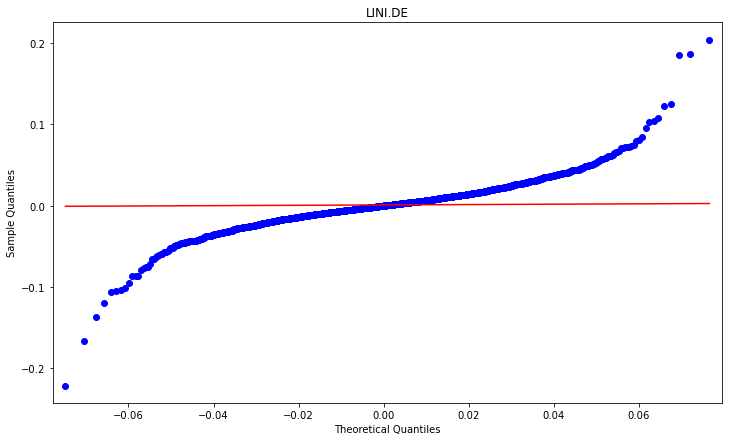

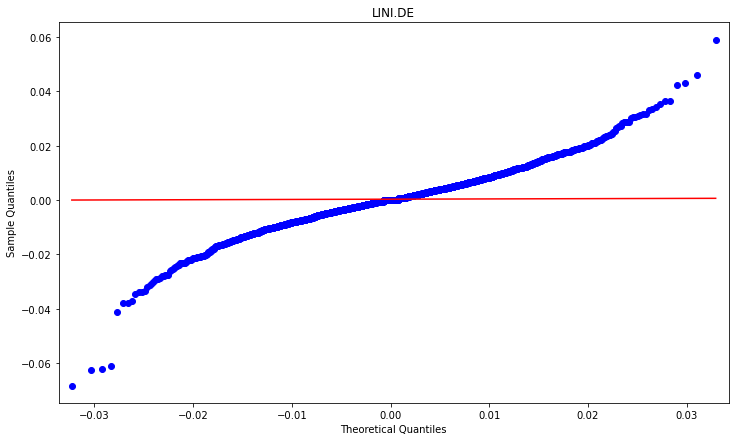

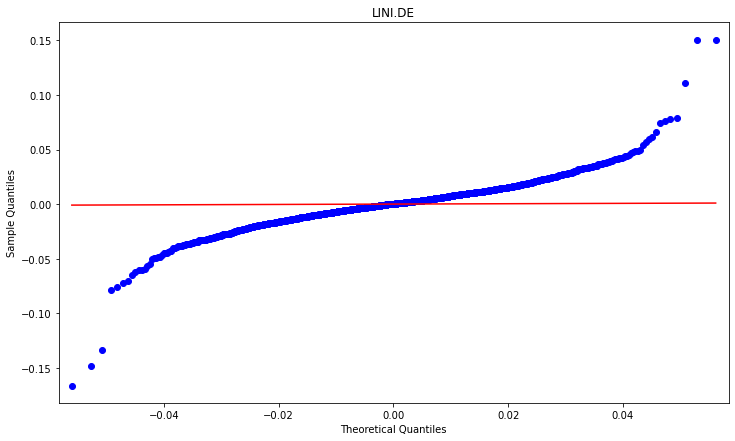

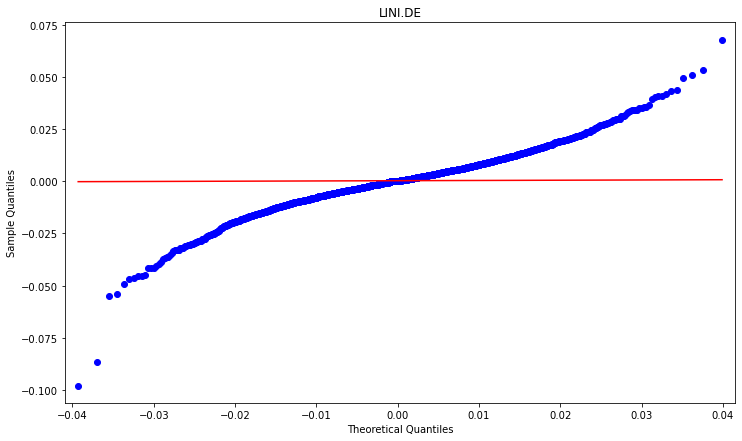

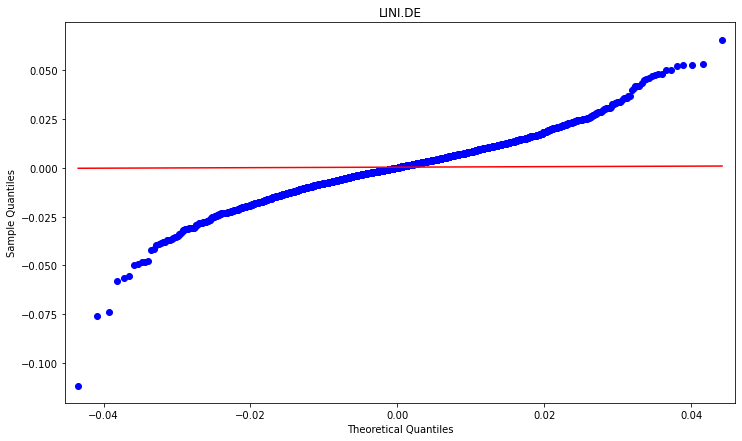

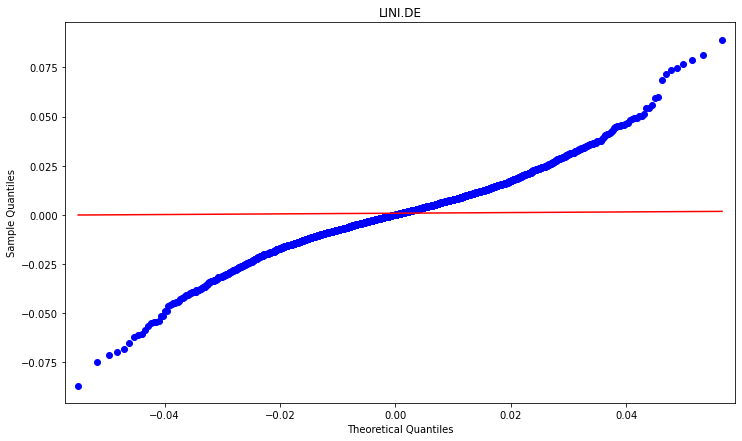

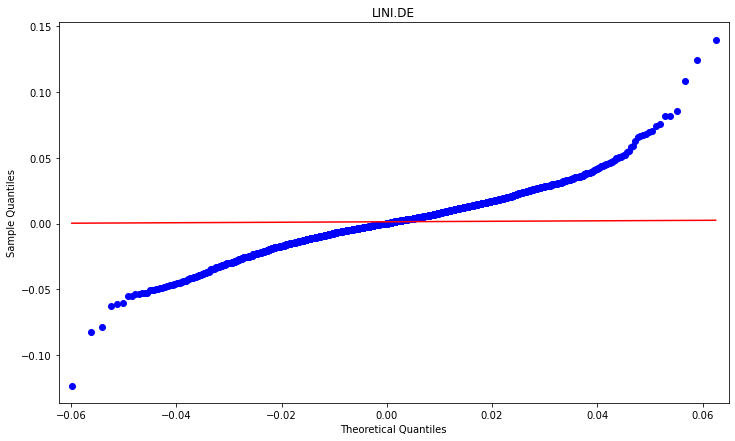

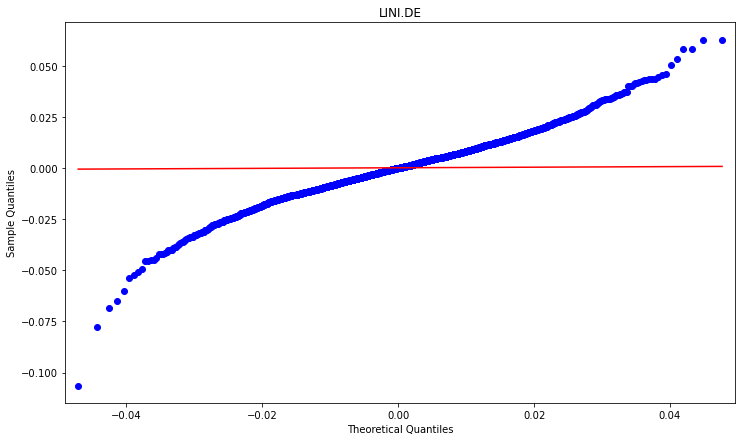

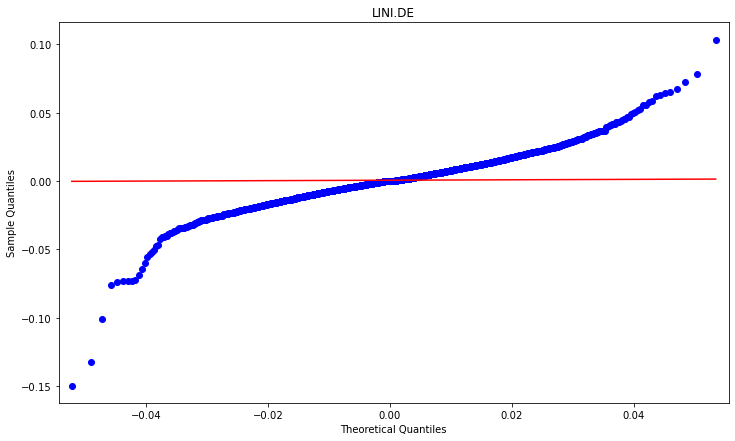

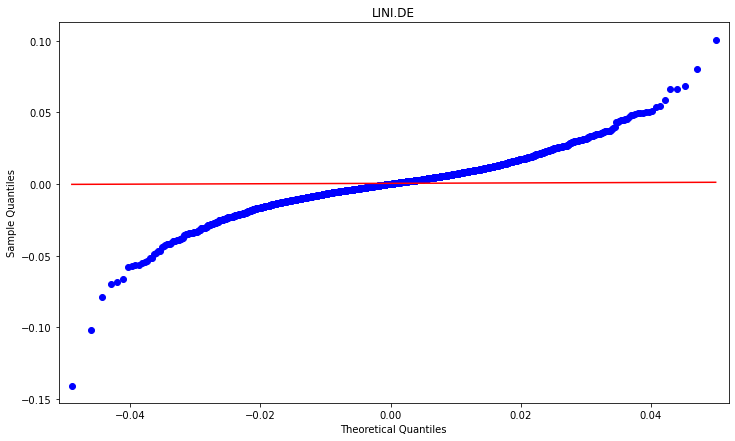

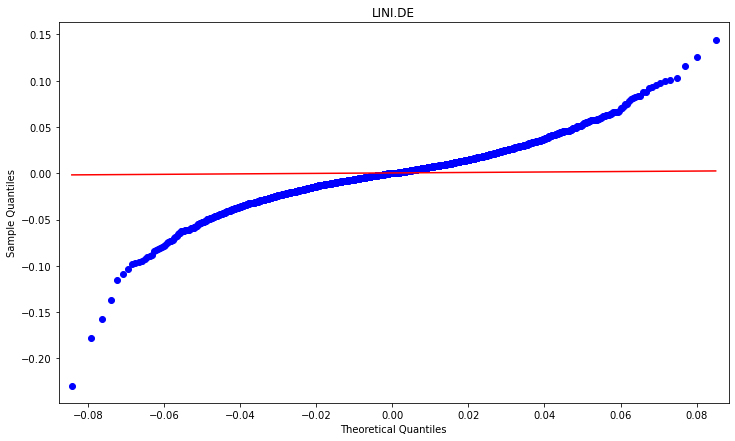

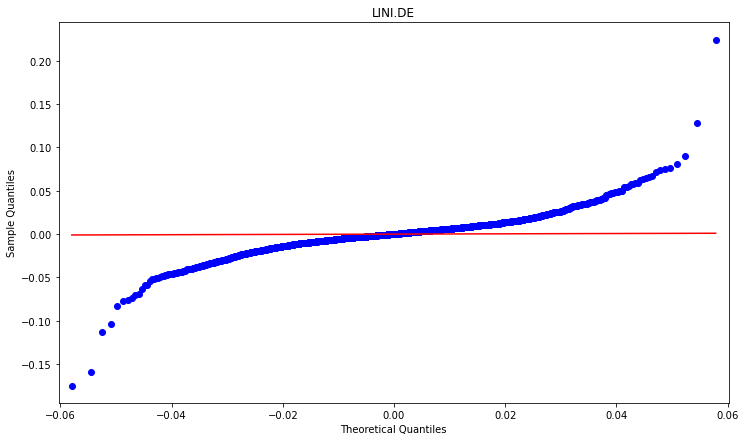

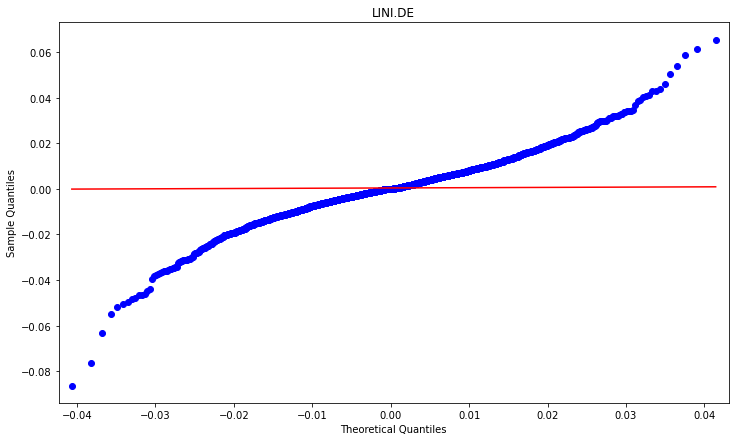

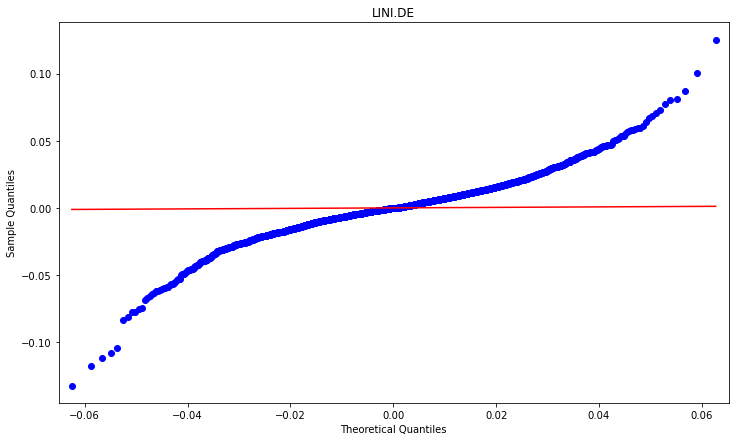

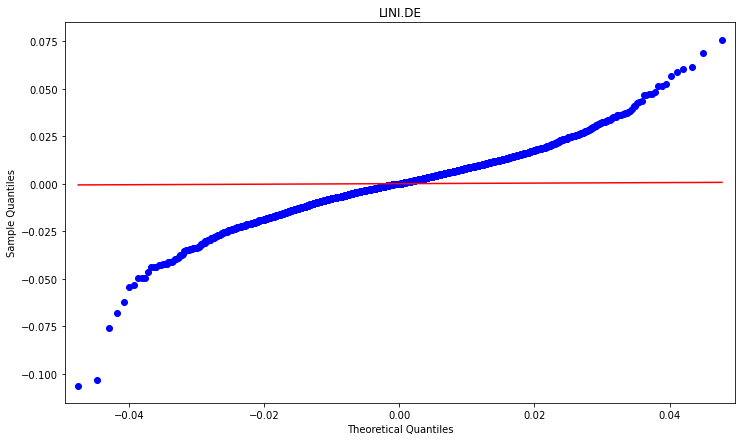

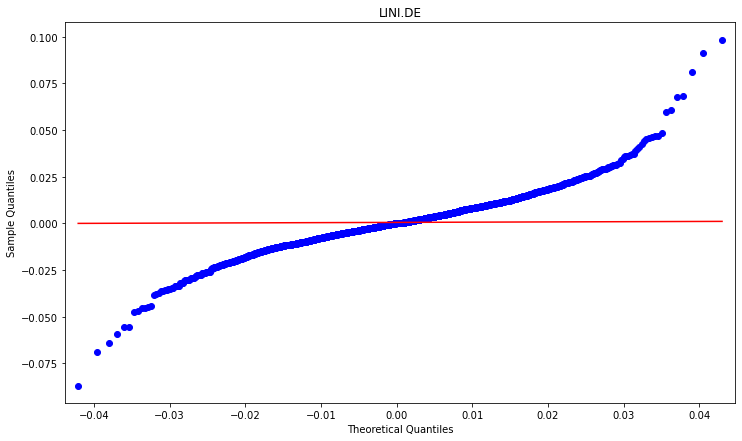

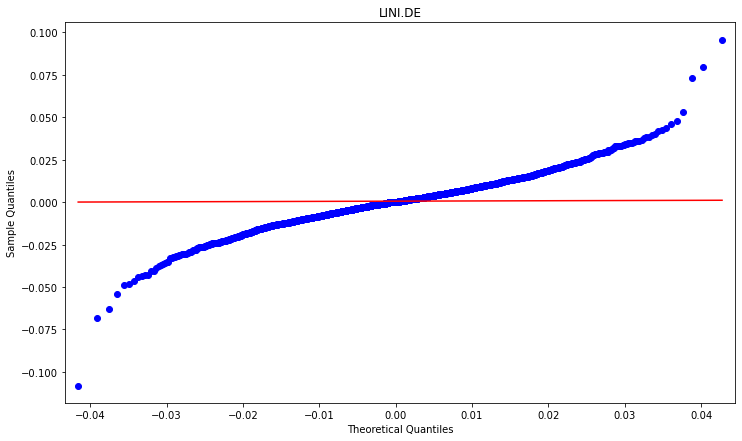

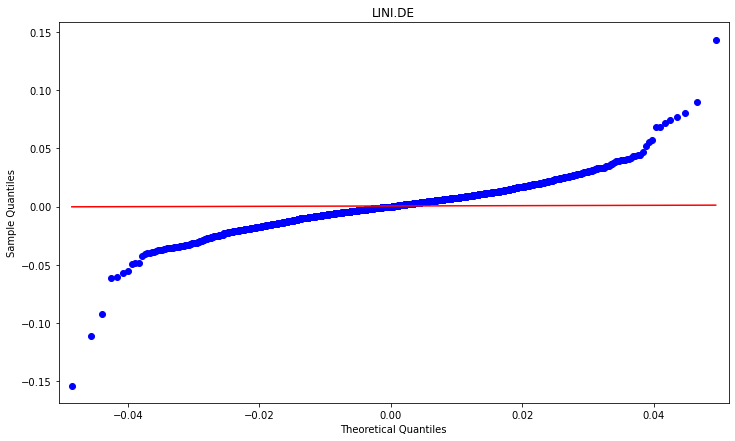

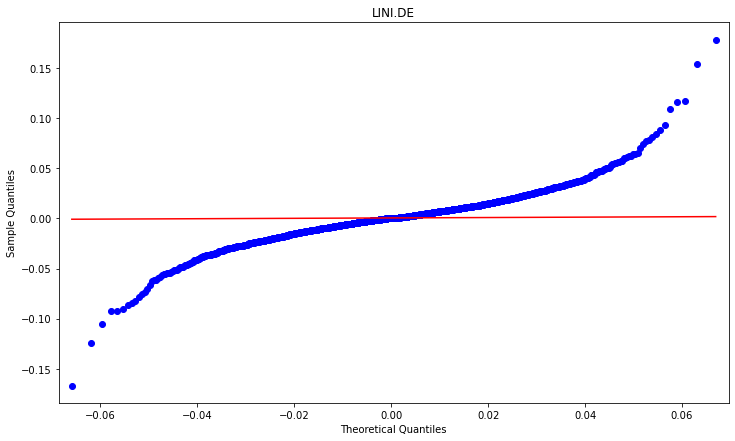

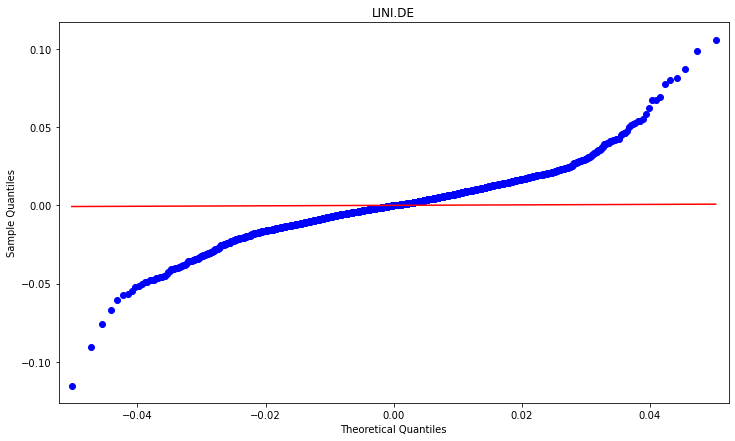

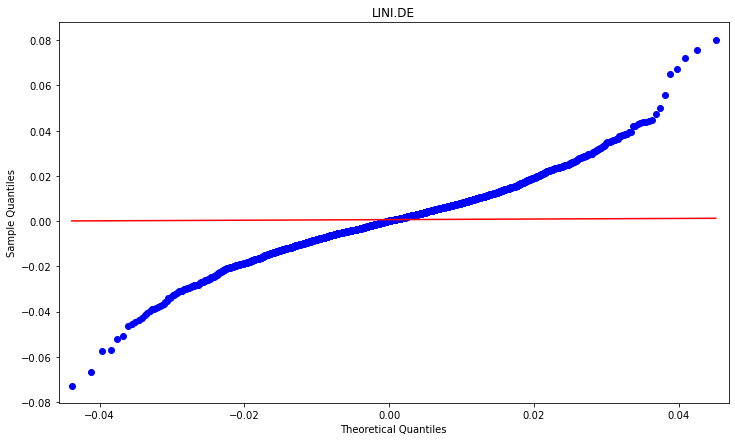

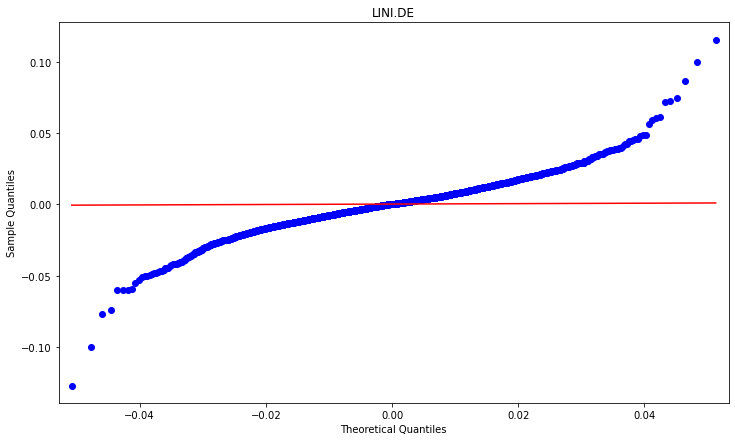

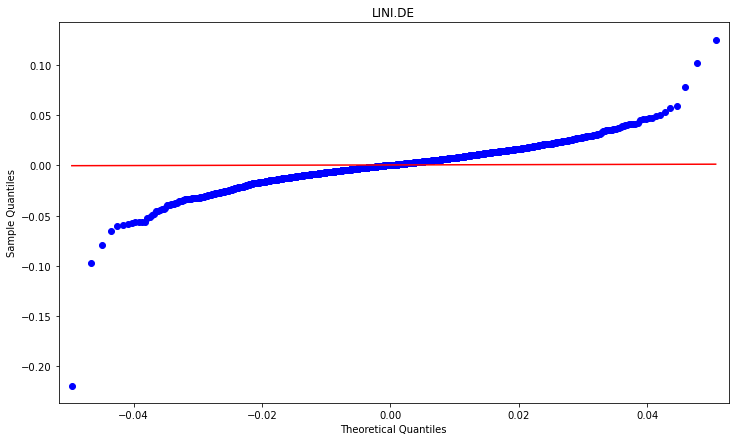

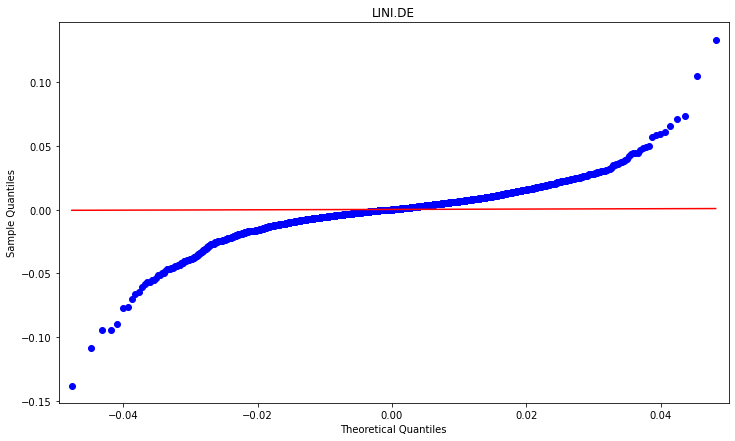

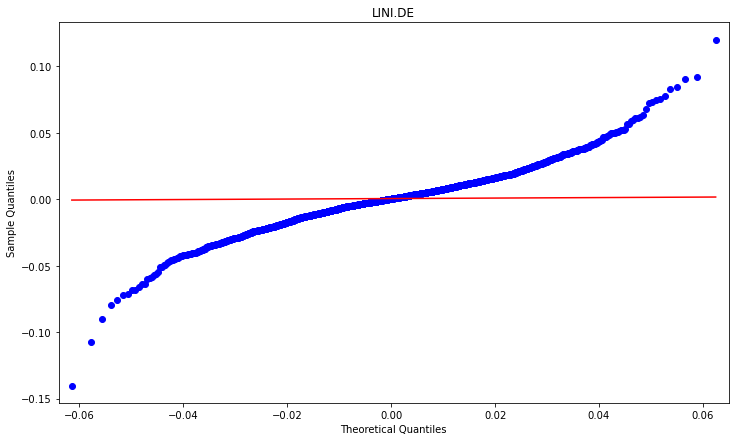

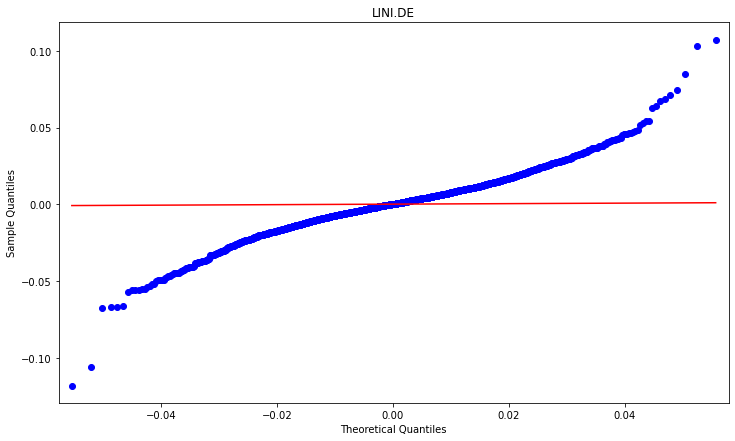

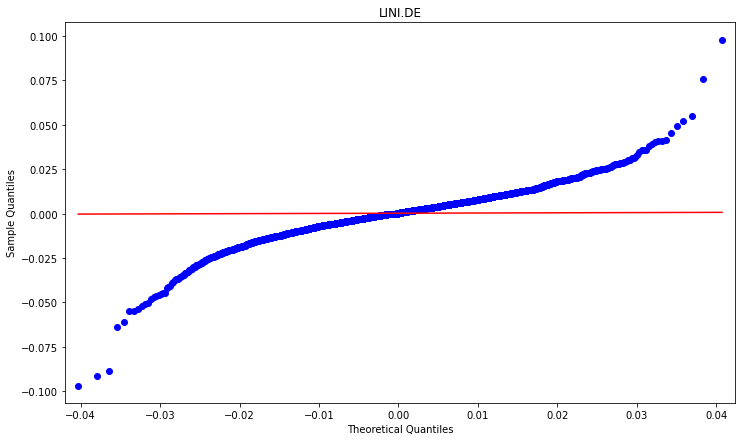

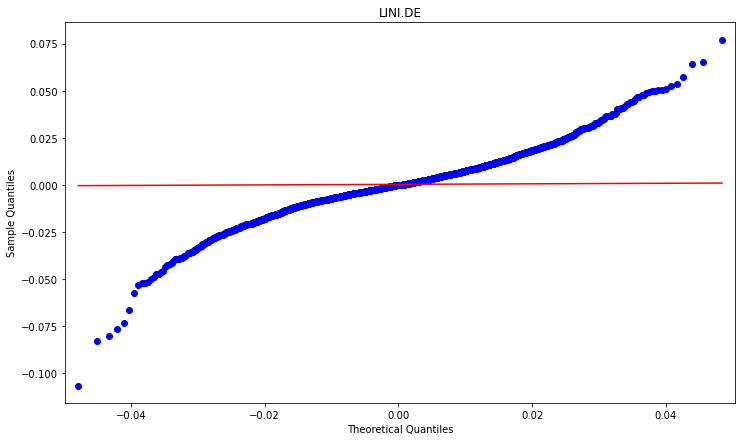

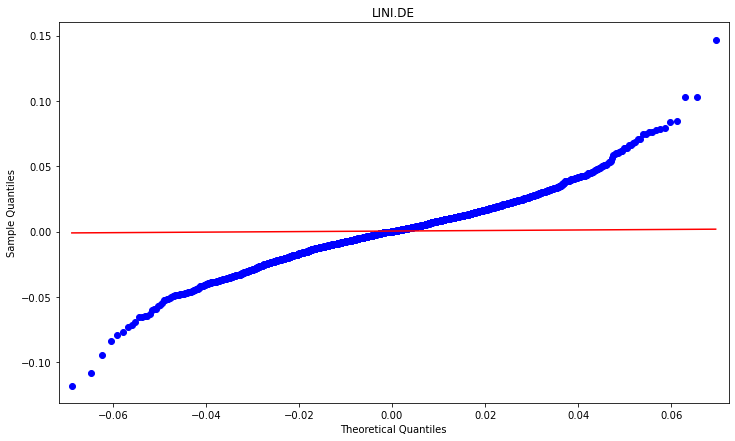

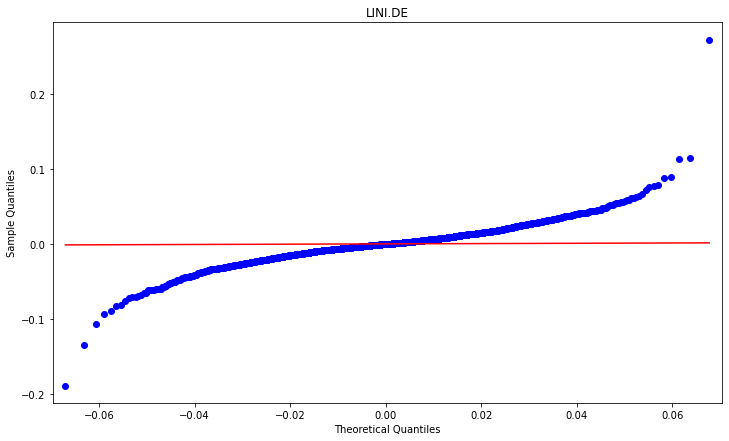

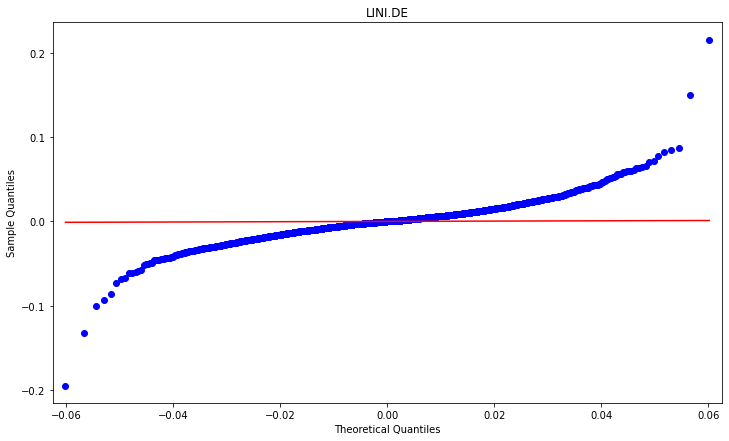

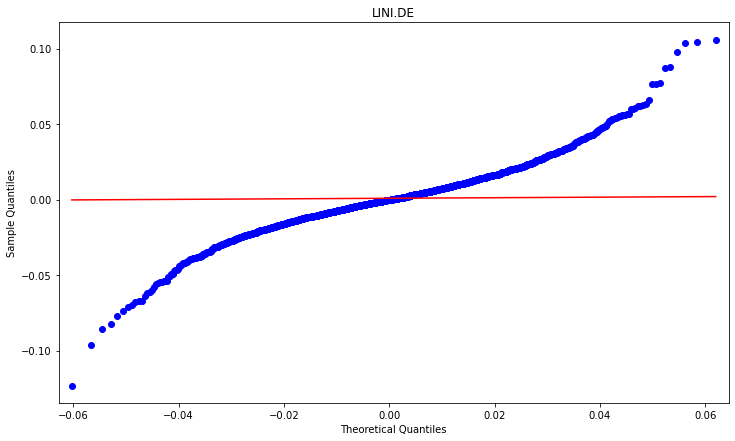

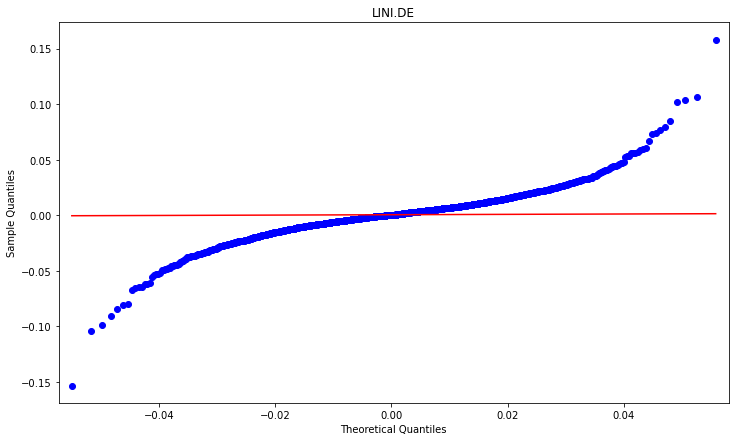

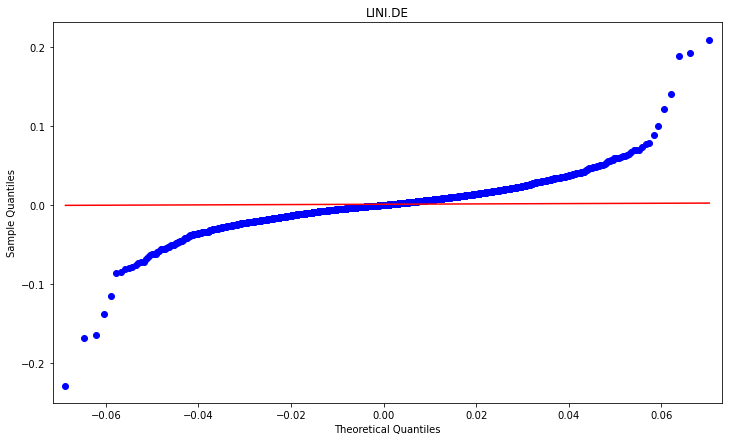

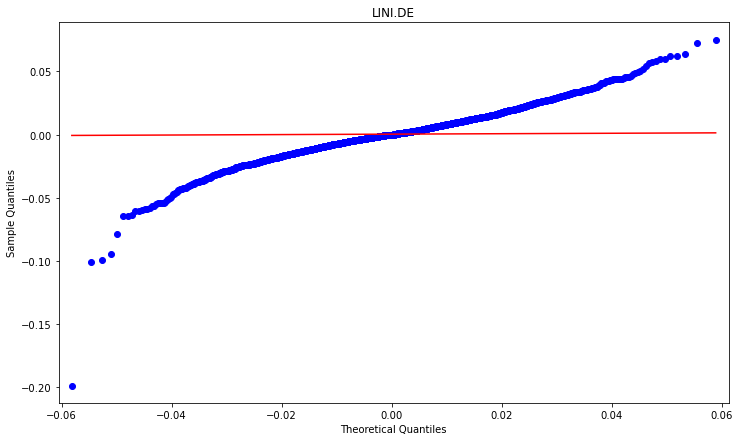

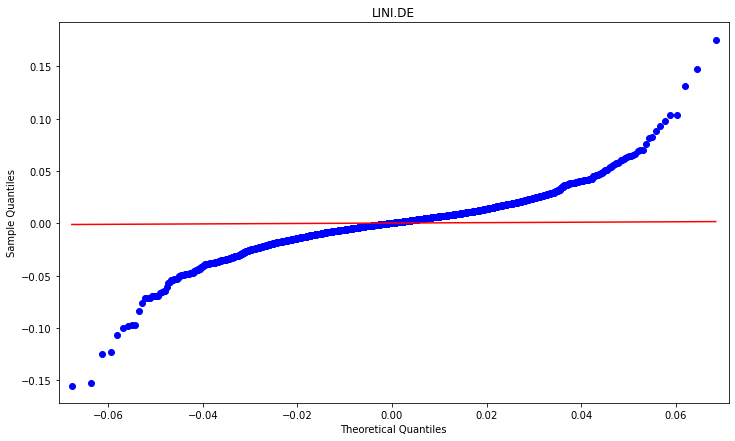

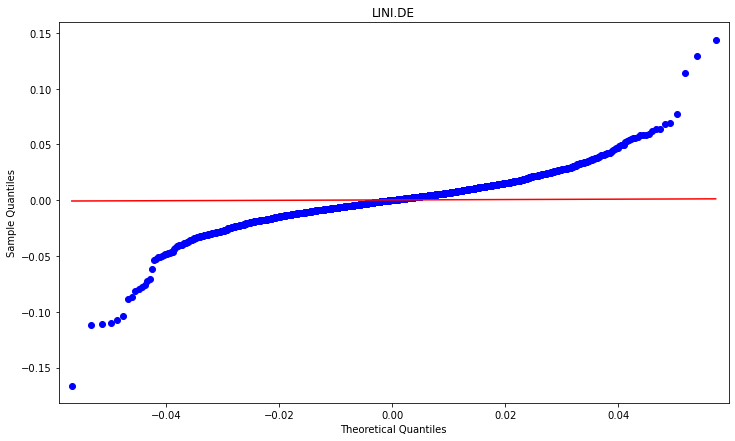

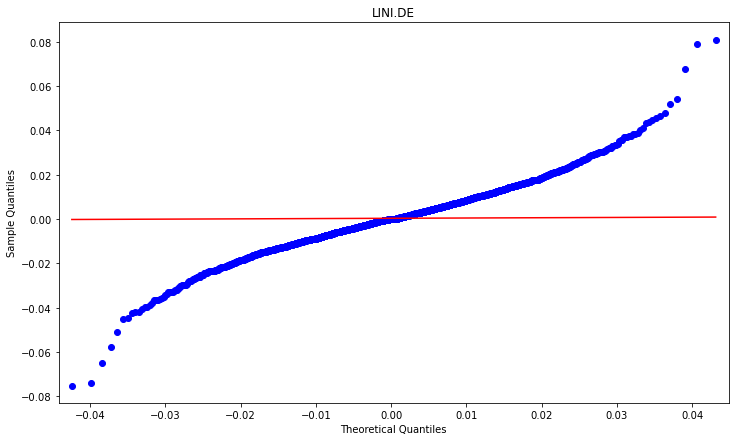

In [306]:
import statistics
for column in df_index_analysis1:
    nor=df_index_analysis1[column].dropna()
    mean1=statistics.mean(nor)
    st_dev1=statistics.stdev(nor)
    obs_count1=len(nor)
    print('Mean: '+ str(mean1))
    print('Standard deviation: '+str(st_dev1))
    print('Trading days: '+ str(obs_count1))
    sm.qqplot(nor, loc = mean1, scale = st_dev1, line='s')
    plt.title(col[0])
    plt.savefig('Charts_QQ_'+col[0]+'.png') ##save the charts as png
    

    
    
    

In [307]:
for column in df_index_analysis1:
    nor=df_index_analysis1[column][1:257]
    jb=stats.jarque_bera(nor)
    print(jb)

Jarque_beraResult(statistic=27.622140726744195, pvalue=1.0044500668993095e-06)
Jarque_beraResult(statistic=21.54189100529138, pvalue=2.100089498857649e-05)
Jarque_beraResult(statistic=11.752774043897732, pvalue=0.0028049010359002535)
Jarque_beraResult(statistic=16.47655243207925, pvalue=0.0002643395211736621)
Jarque_beraResult(statistic=17.263954017923428, pvalue=0.00017831177249161279)
Jarque_beraResult(statistic=3.2341614688530336, pvalue=0.19847726202143845)
Jarque_beraResult(statistic=11.300871733699836, pvalue=0.0035159839400361603)
Jarque_beraResult(statistic=26.63213531756525, pvalue=1.6478030225863805e-06)
Jarque_beraResult(statistic=5.973636372353578, pvalue=0.050447696808564424)
Jarque_beraResult(statistic=56.32423576697807, pvalue=5.879741138414829e-13)
Jarque_beraResult(statistic=93.0861649283755, pvalue=0.0)
Jarque_beraResult(statistic=163.76551534318708, pvalue=0.0)
Jarque_beraResult(statistic=19.26494970167819, pvalue=6.556458629547457e-05)
Jarque_beraResult(statistic=20

# Stationary test (Price dataset)

In [308]:
var_list=df_index[['BNPP.PA','AIR.PA','SAPG.DE']].dropna()


for i in var_list:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(df_index[i].dropna(), maxlag=lags, regression='nc',autolag=None) #here we llok at the prices 
        adf_library_d = adfuller(np.diff(df_index[i].dropna()), maxlag=lags, regression='nc',autolag=None) #here we look at th diff from 1 day to the next

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
BNPP.PA in Level 
 ADF Stat (Library) for BNPP.PA : -0.57 
 ADF P-Val (Library) BNPP.PA : 0.47 

BNPP.PA in 1st Difference 
 ADF Stat (Library) for BNPP.PA : -35.21 
 ADF P-Val (Library) BNPP.PA : 0.00 

Number of lags used: 2
BNPP.PA in Level 
 ADF Stat (Library) for BNPP.PA : -0.57 
 ADF P-Val (Library) BNPP.PA : 0.47 

BNPP.PA in 1st Difference 
 ADF Stat (Library) for BNPP.PA : -30.22 
 ADF P-Val (Library) BNPP.PA : 0.00 

____________________________________________ 

Number of lags used: 1
AIR.PA in Level 
 ADF Stat (Library) for AIR.PA : 0.23 
 ADF P-Val (Library) AIR.PA : 0.76 

AIR.PA in 1st Difference 
 ADF Stat (Library) for AIR.PA : -36.58 
 ADF P-Val (Library) AIR.PA : 0.00 

Number of lags used: 2
AIR.PA in Level 
 ADF Stat (Library) for AIR.PA : 0.31 
 ADF P-Val (Library) AIR.PA : 0.78 

AIR.PA in 1st Difference 
 ADF Stat (Library) for AIR.PA : -28.90 
 ADF P-Val (Library) AIR.PA : 0.00 

____________________________________________ 

Number of la

# Stationary Test (Return dataset)

In [309]:
var_list=df_index_analysis1[['BNPP.PA','AIR.PA','SAPG.DE']].dropna()


for i in var_list:
    for lags in range(1,3):
        print('Number of lags used:',lags)

        adf_library = adfuller(df_index_analysis1[i].dropna(), maxlag=lags, regression='nc',autolag=None) #here we llok at the prices 
        adf_library_d = adfuller(np.diff(df_index_analysis1[i].dropna()), maxlag=lags, regression='nc',autolag=None) #here we look at th diff from 1 day to the next

        print(i,'in Level','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library[1],'\n')

        print(i,'in 1st Difference','\n',
              'ADF Stat (Library) for',i,':',"%.2f" % adf_library_d[0],'\n',
              'ADF P-Val (Library)',i,':',"%.2f" %  adf_library_d[1],'\n')
    print('____________________________________________','\n')

Number of lags used: 1
BNPP.PA in Level 
 ADF Stat (Library) for BNPP.PA : -35.13 
 ADF P-Val (Library) BNPP.PA : 0.00 

BNPP.PA in 1st Difference 
 ADF Stat (Library) for BNPP.PA : -57.26 
 ADF P-Val (Library) BNPP.PA : 0.00 

Number of lags used: 2
BNPP.PA in Level 
 ADF Stat (Library) for BNPP.PA : -31.37 
 ADF P-Val (Library) BNPP.PA : 0.00 

BNPP.PA in 1st Difference 
 ADF Stat (Library) for BNPP.PA : -50.01 
 ADF P-Val (Library) BNPP.PA : 0.00 

____________________________________________ 

Number of lags used: 1
AIR.PA in Level 
 ADF Stat (Library) for AIR.PA : -37.50 
 ADF P-Val (Library) AIR.PA : 0.00 

AIR.PA in 1st Difference 
 ADF Stat (Library) for AIR.PA : -62.02 
 ADF P-Val (Library) AIR.PA : 0.00 

Number of lags used: 2
AIR.PA in Level 
 ADF Stat (Library) for AIR.PA : -30.05 
 ADF P-Val (Library) AIR.PA : 0.00 

AIR.PA in 1st Difference 
 ADF Stat (Library) for AIR.PA : -51.98 
 ADF P-Val (Library) AIR.PA : 0.00 

____________________________________________ 

Number

# Stationary test for all stocks in the Index

In [310]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Prices (Level)')
    for i in df_index:
        adf_library = adfuller(df_index[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(df_index[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library[1],)
    print('____________________________________________','\n')
    
#All p-values are high which means the stocks are not stationary (H0 cannot be rejected)

Number of lags used: 1
ADF P-Val for Prices (Level)
Date : 1.00
.STOXX50 : 0.76
BHPB.L : 0.51
ABBN.S : 0.72
ADSGn.DE : 0.90
BAYGn.DE : 0.52
SGEF.PA : 0.80
GSK.L : 0.60
HSBA.L : 0.33
ULVR.L : 0.85
BNPP.PA : 0.47
AIR.PA : 0.76
NESN.S : 0.94
TOTF.PA : 0.47
NOVN.S : 0.80
AIRP.PA : 0.94
LVMH.PA : 1.00
ASML.AS : 1.00
SASY.PA : 0.74
NOVOb.CO : 0.90
IBE.MC : 0.99
ISP.MI : 0.50
RDSa.AS : 0.36
ROG.S : 0.86
UBSG.S : 0.42
BATS.L : 0.57
DGE.L : 0.93
REL.L : 0.94
AZN.L : 0.88
PRU.L : 0.75
VOD.L : 0.46
OREP.PA : 1.00
SIEGn.DE : 0.79
SAPG.DE : 0.88
ZURN.S : 0.78
SCHN.PA : 0.96
BASFn.DE : 0.55
NG.L : 0.74
DTEGn.DE : 0.74
RIO.L : 0.81
DAIGn.DE : 0.67
BP.L : 0.38
PRTP.PA : 0.98
ALVG.DE : 0.84
SAF.PA : 0.82
ENEI.MI : 0.91
AXAF.PA : 0.67
ABI.BR : 0.61
RKT.L : 0.81
____________________________________________ 

Number of lags used: 2
ADF P-Val for Prices (Level)
Date : 1.00
.STOXX50 : 0.76
BHPB.L : 0.50
ABBN.S : 0.73
ADSGn.DE : 0.90
BAYGn.DE : 0.52
SGEF.PA : 0.80
GSK.L : 0.60
HSBA.L : 0.34
ULVR.L : 0.84
BNP

In [311]:
for lags in range(1,3):
    print('Number of lags used:',lags)
    print('ADF P-Val for Absolute Returns (1st Difference)')
    for i in df_index:
        adf_library = adfuller(df_index[i], maxlag=lags, regression='nc',autolag=None)
        adf_library_d = adfuller(np.diff(df_index[i]), maxlag=lags, regression='nc',autolag=None)

        print(i,':',"%.2f" %  adf_library_d[1])
    print('____________________________________________','\n')

Number of lags used: 1
ADF P-Val for Absolute Returns (1st Difference)
Date : 0.00
.STOXX50 : 0.00
BHPB.L : 0.00
ABBN.S : 0.00
ADSGn.DE : 0.00
BAYGn.DE : 0.00
SGEF.PA : 0.00
GSK.L : 0.00
HSBA.L : 0.00
ULVR.L : 0.00
BNPP.PA : 0.00
AIR.PA : 0.00
NESN.S : 0.00
TOTF.PA : 0.00
NOVN.S : 0.00
AIRP.PA : 0.00
LVMH.PA : 0.00
ASML.AS : 0.00
SASY.PA : 0.00
NOVOb.CO : 0.00
IBE.MC : 0.00
ISP.MI : 0.00
RDSa.AS : 0.00
ROG.S : 0.00
UBSG.S : 0.00
BATS.L : 0.00
DGE.L : 0.00
REL.L : 0.00
AZN.L : 0.00
PRU.L : 0.00
VOD.L : 0.00
OREP.PA : 0.00
SIEGn.DE : 0.00
SAPG.DE : 0.00
ZURN.S : 0.00
SCHN.PA : 0.00
BASFn.DE : 0.00
NG.L : 0.00
DTEGn.DE : 0.00
RIO.L : 0.00
DAIGn.DE : 0.00
BP.L : 0.00
PRTP.PA : 0.00
ALVG.DE : 0.00
SAF.PA : 0.00
ENEI.MI : 0.00
AXAF.PA : 0.00
ABI.BR : 0.00
RKT.L : 0.00
____________________________________________ 

Number of lags used: 2
ADF P-Val for Absolute Returns (1st Difference)
Date : 0.00
.STOXX50 : 0.00
BHPB.L : 0.00
ABBN.S : 0.00
ADSGn.DE : 0.00
BAYGn.DE : 0.00
SGEF.PA : 0.00
GSK.L 

# Granger Causality for all stocks in the STOXX50 index

In [322]:
df_index=df_index.set_index('Date')
n_obs=2     #time lags
X_train, X_test = df_index[0:-n_obs], df_index[-n_obs:]
print(X_train.shape, X_test.shape)

(2560, 48) (2, 48)


In [323]:
transform_data=X_train.diff().dropna()
transform_data.head()

.STOXX50     BHPB.L  ABBN.S  ADSGn.DE  BAYGn.DE   SGEF.PA  \
Date                                                                    
2011-05-02     -0.88   0.000000   -0.32    -0.060 -1.200596 -0.232689   
2011-05-03     -8.91   0.000000   -0.55     0.030  0.413320 -0.024754   
2011-05-04    -36.74 -58.212468   -0.15    -0.345 -1.141550 -0.643607   
2011-05-05     -6.16 -31.994639   -0.26     3.615  0.580616 -0.292099   
2011-05-06     31.55  39.548928    0.48    -0.620  0.984095  0.693116   

               GSK.L  HSBA.L  ULVR.L  BNPP.PA  ...       RIO.L  DAIGn.DE  \
Date                                           ...                         
2011-05-02  0.000000     0.0     0.0    -0.04  ...    0.000000      0.32   
2011-05-03  0.000000     0.0     0.0     0.06  ...    0.000000     -0.86   
2011-05-04 -9.366572   -10.7   -14.0     0.60  ... -131.759391     -0.91   
2011-05-05  3.450842    -5.6   -22.0    -0.07  ...  -60.956302     -0.09   
2011-05-06  5.915730     5.5    27.0     0.45  ...   60.018513      0.68   

             BP.L   PRTP.PA  ALVG.DE  SAF.PA  ENEI.MI  AXAF.PA  ABI.BR  \
Date                                                                     
2011-05-02   0.00 -0.137071    -0.40   0.020    0.002    0.010  -0.005   
2011-05-03   0.00  0.913809     0.45  -0.220   -0.012    0.055  -0.185   
2011-05-04  -9.25 -1.096571    -1.65  -0.445   -0.074   -0.220  -1.410   
2011-05-05  -7.65 -0.776738    -4.25  -0.205   -0.024    0.030  -0.750   
2011-05-06  13.65  1.644856     1.40   0.745   -0.044    0.165   0.590   

                RKT.L  
Date                   
2011-05-02   0.000000  
2011-05-03   0.000000  
2011-05-04 -11.728812  
2011-05-05  -2.932203  
2011-05-06  72.327674  

[5 rows x 48 columns]

In [324]:
transform_data.to_excel('6.transform_data.xlsx')

In [325]:
transform_data.describe()
    

.STOXX50       BHPB.L       ABBN.S     ADSGn.DE     BAYGn.DE  \
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000   
mean      0.283212    -0.012425     0.002321     0.086475    -0.000999   
std      30.007680    29.717512     0.291731     2.987296     1.436020   
min    -300.030000  -220.800000    -2.170000   -26.920000    -9.630000   
25%     -13.500000   -16.112815    -0.140000    -0.900000    -0.704274   
50%       0.960000     0.000000     0.000000     0.000000     0.000000   
75%      15.590000    17.161578     0.160000     1.100000     0.738071   
max     190.750000   182.600000     1.645000    21.400000     6.495027   

           SGEF.PA        GSK.L       HSBA.L       ULVR.L      BNPP.PA  ...  \
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000  ...   
mean      0.016711     0.019728    -0.096385     0.841149    -0.001200  ...   
std       1.115270    17.856058     7.973314    43.382861     0.938543  ...   
min     -13.120000  -123.600000   -46.600000  -331.500000    -8.300000  ...   
25%      -0.470000    -9.859550    -4.200000   -19.000000    -0.540000  ...   
50%       0.014852     0.000000     0.000000     0.000000     0.000000  ...   
75%       0.480000    10.000000     4.300000    21.500000     0.537500  ...   
max      13.860000   100.400000    37.550000   449.500000     5.975000  ...   

             RIO.L     DAIGn.DE         BP.L      PRTP.PA      ALVG.DE  \
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000   
mean      0.761446     0.008355    -0.063404     0.211746     0.042946   
std      67.037540     0.994008     6.910833     6.083057     2.279044   
min    -490.230440    -5.830000   -77.000000   -54.000000   -26.520000   
25%     -34.229308    -0.470000    -3.700000    -1.650000    -0.980000   
50%       0.937789     0.000000     0.000000     0.091381     0.050000   
75%      36.104887     0.537500     3.500000     2.000000     1.150000   
max     450.773732     6.275000    55.450000    42.400000    20.820000   

            SAF.PA      ENEI.MI      AXAF.PA       ABI.BR        RKT.L  
count  2559.000000  2559.000000  2559.000000  2559.000000  2559.000000  
mean      0.035498     0.001435     0.003134     0.005756     1.344770  
std       1.559632     0.081925     0.339023     1.198771    74.632376  
min     -17.340000    -1.294000    -3.330000    -9.170000  -493.000000  
25%      -0.485000    -0.036000    -0.160000    -0.600000   -38.000000  
50%       0.020000     0.000000     0.014000     0.010000     0.000000  
75%       0.552500     0.042000     0.170000     0.590000    40.000000  
max      13.860000     0.534000     2.362000     6.050000   499.000000  

[8 rows x 48 columns]

In [326]:
from statsmodels.tsa.stattools import grangercausalitytests
maxlag=3

test = 'ssr-chi2test'

def grangers_causality_matrix(data, variables, test = 'ssr_chi2test', verbose=False):
    dataset = pd.DataFrame(np.zeros((len(variables), len(variables))), columns=variables, index=variables)
    m_values = []
    
    
    for c in dataset.columns:
        m2_values = []
        for r in dataset.index:
            test_result = grangercausalitytests(data[[r,c]], maxlag=maxlag, verbose=False)
            p_values = [round(test_result[i+1][0][test][1],4) for i in range(maxlag)]
            if verbose: print(f'Y = {r}, X = {c}, P Values = {p_values}')
                
            min_p_value = np.min(p_values)
            dataset.loc[r,c] = min_p_value if not r == c else 1
            m2_values.append(min_p_value if not r == c else 1)
        m_values.append(m2_values)
        
    dataset.columns = [var + '_x' for var in variables]
    dataset.index = [var + '_y' for var in variables]
    return dataset, m_values

In [327]:
x,m_values=grangers_causality_matrix(df_index, variables=df_index.columns)
# we are creting two variables
#x: the granger's matrix 
#m_values: the values for each column as a list (we need to input it as a list in the function)

In [328]:
x #Granger causality matrix

.STOXX50_x  BHPB.L_x  ABBN.S_x  ADSGn.DE_x  BAYGn.DE_x  SGEF.PA_x  \
.STOXX50_y      1.0000    0.0204    0.0331      0.0311      0.8036     0.0024   
BHPB.L_y        0.0039    1.0000    0.2706      0.1569      0.0004     0.3916   
ABBN.S_y        0.4684    0.0151    1.0000      0.0236      0.5936     0.0372   
ADSGn.DE_y      0.2103    0.0068    0.0651      1.0000      0.2542     0.0725   
BAYGn.DE_y      0.0150    0.4421    0.1261      0.0996      1.0000     0.0392   
SGEF.PA_y       0.1247    0.0466    0.0356      0.0000      0.6387     1.0000   
GSK.L_y         0.1136    0.0223    0.0433      0.1733      0.4686     0.5915   
HSBA.L_y        0.0332    0.0548    0.4427      0.3699      0.4278     0.2294   
ULVR.L_y        0.3072    0.0017    0.1436      0.1297      0.2692     0.0002   
BNPP.PA_y       0.3031    0.3009    0.0477      0.0244      0.0285     0.2287   
AIR.PA_y        0.1588    0.0182    0.1285      0.0102      0.4778     0.0080   
NESN.S_y        0.2102    0.1869    0.1040      0.0549      0.3033     0.0015   
TOTF.PA_y       0.1234    0.1227    0.1905      0.0194      0.2215     0.0392   
NOVN.S_y        0.1773    0.2398    0.3610      0.3879      0.7390     0.0021   
AIRP.PA_y       0.0975    0.5220    0.0503      0.0003      0.1970     0.0948   
LVMH.PA_y       0.0182    0.1098    0.3907      0.1442      0.1538     0.0117   
ASML.AS_y       0.0196    0.5288    0.1904      0.0205      0.1240     0.0014   
SASY.PA_y       0.5240    0.3657    0.3633      0.4424      0.0728     0.0911   
NOVOb.CO_y      0.0134    0.2302    0.1568      0.0125      0.5856     0.1053   
IBE.MC_y        0.0001    0.0274    0.0002      0.0000      0.2207     0.2282   
ISP.MI_y        0.1668    0.2800    0.3700      0.1452      0.0047     0.4555   
RDSa.AS_y       0.0018    0.2980    0.0902      0.0358      0.6088     0.0031   
ROG.S_y         0.0809    0.1060    0.1153      0.0440      0.2835     0.0000   
UBSG.S_y        0.9183    0.1934    0.6726      0.3113      0.0021     0.1576   
BATS.L_y        0.1317    0.0031    0.1409      0.1180      0.0509     0.1916   
DGE.L_y         0.0399    0.0001    0.0542      0.0121      0.0829     0.1955   
REL.L_y         0.2030    0.0885    0.1953      0.1459      0.6561     0.7597   
AZN.L_y         0.5044    0.4772    0.4556      0.0278      0.5500     0.0162   
PRU.L_y         0.4980    0.0381    0.1152      0.0001      0.7199     0.2015   
VOD.L_y         0.1125    0.0911    0.0789      0.0039      0.2919     0.0250   
OREP.PA_y       0.0072    0.0033    0.0598      0.0004      0.1596     0.0002   
SIEGn.DE_y      0.2893    0.1544    0.1301      0.0467      0.3636     0.2797   
SAPG.DE_y       0.7565    0.8042    0.0642      0.0315      0.5805     0.0178   
ZURN.S_y        0.3240    0.5719    0.6124      0.0012      0.2959     0.0001   
SCHN.PA_y       0.0237    0.0891    0.0007      0.0018      0.0573     0.6055   
BASFn.DE_y      0.0610    0.0028    0.1590      0.5301      0.0888     0.0302   
NG.L_y          0.6124    0.0367    0.4836      0.0796      0.2164     0.0808   
DTEGn.DE_y      0.8933    0.1681    0.3325      0.0404      0.5157     0.2086   
RIO.L_y         0.0209    0.0203    0.1915      0.0086      0.0518     0.0508   
DAIGn.DE_y      0.0353    0.4244    0.5136      0.8795      0.0544     0.1558   
BP.L_y          0.0201    0.1916    0.2487      0.1395      0.3747     0.0180   
PRTP.PA_y       0.2481    0.3563    0.8491      0.0280      0.5945     0.0031   
ALVG.DE_y       0.3076    0.5967    0.1411      0.0066      0.7919     0.0297   
SAF.PA_y        0.8172    0.5469    0.6322      0.0002      0.8825     0.0503   
ENEI.MI_y       0.5822    0.6422    0.3542      0.0000      0.2458     0.0333   
AXAF.PA_y       0.2028    0.1418    0.0841      0.0176      0.2258     0.1725   
ABI.BR_y        0.0139    0.2165    0.0171      0.0107      0.3235     0.0135   
RKT.L_y         0.6035    0.0016    0.2777      0.8691      0.0842     0.1161   

            GSK.L_x  HSBA.L_x  ULVR.L_x  B

In [332]:
x.min()

.STOXX50_x    0.0001
BHPB.L_x      0.0001
ABBN.S_x      0.0002
ADSGn.DE_x    0.0000
BAYGn.DE_x    0.0004
SGEF.PA_x     0.0000
GSK.L_x       0.0036
HSBA.L_x      0.0021
ULVR.L_x      0.0000
BNPP.PA_x     0.0045
AIR.PA_x      0.0043
NESN.S_x      0.0000
TOTF.PA_x     0.0023
NOVN.S_x      0.0019
AIRP.PA_x     0.0003
LVMH.PA_x     0.0001
ASML.AS_x     0.0000
SASY.PA_x     0.0021
NOVOb.CO_x    0.0033
IBE.MC_x      0.0000
ISP.MI_x      0.0018
RDSa.AS_x     0.0001
ROG.S_x       0.0000
UBSG.S_x      0.0015
BATS.L_x      0.0002
DGE.L_x       0.0000
REL.L_x       0.0000
AZN.L_x       0.0000
PRU.L_x       0.0012
VOD.L_x       0.0006
OREP.PA_x     0.0001
SIEGn.DE_x    0.0022
SAPG.DE_x     0.0017
ZURN.S_x      0.0000
SCHN.PA_x     0.0028
BASFn.DE_x    0.0004
NG.L_x        0.0001
DTEGn.DE_x    0.0216
RIO.L_x       0.0039
DAIGn.DE_x    0.0014
BP.L_x        0.0000
PRTP.PA_x     0.0007
ALVG.DE_x     0.0000
SAF.PA_x      0.0000
ENEI.MI_x     0.0000
AXAF.PA_x     0.0001
ABI.BR_x      0.0006
RKT.L_x      

In [334]:
x.to_excel('7.grangers causality matrix.xlsx') 
#we are importing this excel table into SQL directly, instead of exporting it using Python like in the 1st section of this paper


In [335]:
m_values

[[1,
  0.0039,
  0.4684,
  0.2103,
  0.015,
  0.1247,
  0.1136,
  0.0332,
  0.3072,
  0.3031,
  0.1588,
  0.2102,
  0.1234,
  0.1773,
  0.0975,
  0.0182,
  0.0196,
  0.524,
  0.0134,
  0.0001,
  0.1668,
  0.0018,
  0.0809,
  0.9183,
  0.1317,
  0.0399,
  0.203,
  0.5044,
  0.498,
  0.1125,
  0.0072,
  0.2893,
  0.7565,
  0.324,
  0.0237,
  0.061,
  0.6124,
  0.8933,
  0.0209,
  0.0353,
  0.0201,
  0.2481,
  0.3076,
  0.8172,
  0.5822,
  0.2028,
  0.0139,
  0.6035],
 [0.0204,
  1,
  0.0151,
  0.0068,
  0.4421,
  0.0466,
  0.0223,
  0.0548,
  0.0017,
  0.3009,
  0.0182,
  0.1869,
  0.1227,
  0.2398,
  0.522,
  0.1098,
  0.5288,
  0.3657,
  0.2302,
  0.0274,
  0.28,
  0.298,
  0.106,
  0.1934,
  0.0031,
  0.0001,
  0.0885,
  0.4772,
  0.0381,
  0.0911,
  0.0033,
  0.1544,
  0.8042,
  0.5719,
  0.0891,
  0.0028,
  0.0367,
  0.1681,
  0.0203,
  0.4244,
  0.1916,
  0.3563,
  0.5967,
  0.5469,
  0.6422,
  0.1418,
  0.2165,
  0.0016],
 [0.0331,
  0.2706,
  1,
  0.0651,
  0.1261,
  0.0356,
  0.

In [336]:
min_list= []

c_index= 0

for r in x.columns :
    r_index= 0
    i_index = 0
    i_value = 0
    for c in x.index :
        value = m_values[c_index][r_index]
        i_index = r
        if value < i_value:
            i_value = value
        r_index+=1 
    min_list.append([c, i_index, i_value])
    c_index+=1


print(min_list)

[['RKT.L_y', '.STOXX50_x', 0], ['RKT.L_y', 'BHPB.L_x', 0], ['RKT.L_y', 'ABBN.S_x', 0], ['RKT.L_y', 'ADSGn.DE_x', 0], ['RKT.L_y', 'BAYGn.DE_x', 0], ['RKT.L_y', 'SGEF.PA_x', 0], ['RKT.L_y', 'GSK.L_x', 0], ['RKT.L_y', 'HSBA.L_x', 0], ['RKT.L_y', 'ULVR.L_x', 0], ['RKT.L_y', 'BNPP.PA_x', 0], ['RKT.L_y', 'AIR.PA_x', 0], ['RKT.L_y', 'NESN.S_x', 0], ['RKT.L_y', 'TOTF.PA_x', 0], ['RKT.L_y', 'NOVN.S_x', 0], ['RKT.L_y', 'AIRP.PA_x', 0], ['RKT.L_y', 'LVMH.PA_x', 0], ['RKT.L_y', 'ASML.AS_x', 0], ['RKT.L_y', 'SASY.PA_x', 0], ['RKT.L_y', 'NOVOb.CO_x', 0], ['RKT.L_y', 'IBE.MC_x', 0], ['RKT.L_y', 'ISP.MI_x', 0], ['RKT.L_y', 'RDSa.AS_x', 0], ['RKT.L_y', 'ROG.S_x', 0], ['RKT.L_y', 'UBSG.S_x', 0], ['RKT.L_y', 'BATS.L_x', 0], ['RKT.L_y', 'DGE.L_x', 0], ['RKT.L_y', 'REL.L_x', 0], ['RKT.L_y', 'AZN.L_x', 0], ['RKT.L_y', 'PRU.L_x', 0], ['RKT.L_y', 'VOD.L_x', 0], ['RKT.L_y', 'OREP.PA_x', 0], ['RKT.L_y', 'SIEGn.DE_x', 0], ['RKT.L_y', 'SAPG.DE_x', 0], ['RKT.L_y', 'ZURN.S_x', 0], ['RKT.L_y', 'SCHN.PA_x', 0], ['RKT

In [337]:
min_list=pd.DataFrame(min_list,columns=['y','x','p-values'])
min_list

y           x  p-values
0   RKT.L_y  .STOXX50_x         0
1   RKT.L_y    BHPB.L_x         0
2   RKT.L_y    ABBN.S_x         0
3   RKT.L_y  ADSGn.DE_x         0
4   RKT.L_y  BAYGn.DE_x         0
5   RKT.L_y   SGEF.PA_x         0
6   RKT.L_y     GSK.L_x         0
7   RKT.L_y    HSBA.L_x         0
8   RKT.L_y    ULVR.L_x         0
9   RKT.L_y   BNPP.PA_x         0
10  RKT.L_y    AIR.PA_x         0
11  RKT.L_y    NESN.S_x         0
12  RKT.L_y   TOTF.PA_x         0
13  RKT.L_y    NOVN.S_x         0
14  RKT.L_y   AIRP.PA_x         0
15  RKT.L_y   LVMH.PA_x         0
16  RKT.L_y   ASML.AS_x         0
17  RKT.L_y   SASY.PA_x         0
18  RKT.L_y  NOVOb.CO_x         0
19  RKT.L_y    IBE.MC_x         0
20  RKT.L_y    ISP.MI_x         0
21  RKT.L_y   RDSa.AS_x         0
22  RKT.L_y     ROG.S_x         0
23  RKT.L_y    UBSG.S_x         0
24  RKT.L_y    BATS.L_x         0
25  RKT.L_y     DGE.L_x         0
26  RKT.L_y     REL.L_x         0
27  RKT.L_y     AZN.L_x         0
28  RKT.L_y     PRU.L_x         0
29  RKT.L_y     VOD.L_x         0
30  RKT.L_y   OREP.PA_x         0
31  RKT.L_y  SIEGn.DE_x         0
32  RKT.L_y   SAPG.DE_x         0
33  RKT.L_y    ZURN.S_x         0
34  RKT.L_y   SCHN.PA_x         0
35  RKT.L_y  BASFn.DE_x         0
36  RKT.L_y      NG.L_x         0
37  RKT.L_y  DTEGn.DE_x         0
38  RKT.L_y     RIO.L_x         0
39  RKT.L_y  DAIGn.DE_x         0
40  RKT.L_y      BP.L_x         0
41  RKT.L_y   PRTP.PA_x         0
42  RKT.L_y   ALVG.DE_x         0
43  RKT.L_y    SAF.PA_x         0
44  RKT.L_y   ENEI.MI_x         0
45  RKT.L_y   AXAF.PA_x         0
46  RKT.L_y    ABI.BR_x         0
47  RKT.L_y     RKT.L_x         0

In [338]:
min_list.to_excel('8.Leading asset.xlsx')

# Cointegration test

In [339]:
#http://www.statsmodels.org/dev/generated/statsmodels.tsa.stattools.coint.html
#import warnings
#warnings.simplefilter('ignore')
import statsmodels.api as sm


df_index['Constant']= 1

x_list=df_index[['BHPB.L', 'ABBN.S', 'ADSGn.DE', 'BAYGn.DE',
       'SGEF.PA', 'GSK.L', 'HSBA.L', 'ULVR.L', 'BNPP.PA', 'AIR.PA',
       'NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'LVMH.PA', 'ASML.AS',
       'SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'DGE.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L', 'OREP.PA',
       'SIEGn.DE', 'SAPG.DE', 'ZURN.S', 'SCHN.PA', 'BASFn.DE', 'NG.L',
       'DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'BP.L', 'PRTP.PA', 'ALVG.DE',
       'SAF.PA', 'ENEI.MI', 'AXAF.PA', 'ABI.BR', 'RKT.L']]
y_list = df_index[['BHPB.L', 'ABBN.S', 'ADSGn.DE', 'BAYGn.DE',
       'SGEF.PA', 'GSK.L', 'HSBA.L', 'ULVR.L', 'BNPP.PA', 'AIR.PA',
       'NESN.S', 'TOTF.PA', 'NOVN.S', 'AIRP.PA', 'LVMH.PA', 'ASML.AS',
       'SASY.PA', 'NOVOb.CO', 'IBE.MC', 'ISP.MI', 'RDSa.AS', 'ROG.S', 'UBSG.S',
       'BATS.L', 'DGE.L', 'REL.L', 'AZN.L', 'PRU.L', 'VOD.L', 'OREP.PA',
       'SIEGn.DE', 'SAPG.DE', 'ZURN.S', 'SCHN.PA', 'BASFn.DE', 'NG.L',
       'DTEGn.DE', 'RIO.L', 'DAIGn.DE', 'BP.L', 'PRTP.PA', 'ALVG.DE',
       'SAF.PA', 'ENEI.MI', 'AXAF.PA', 'ABI.BR', 'RKT.L']]
max_lags=3
counter_total=1
counter_lib_ECMLib=1
counter_lib_ECMLib_n_Coded=1

print('Number of identified cointegrations using the ECM Library by asset: ')

for y_name in y_list: 
    
    y=df_index[y_name]
    counter_lib_ECMLib_success_temp = 0
    counter_total_byasset=0
    lags_success=[]
    R2_success=[]
    
    for lags in range(0,max_lags,1):
    
        for i in x_list:
            
            if not y_name==i :
                counter_total=counter_total+1
                counter_total_byasset=counter_total_byasset+1
                
                x_nc=df_index[i]
                x=df_index[[i,'Constant']]
                
                if y.shape>x_nc.shape: 
                    temp=y.drop(y.index[0])
                    y=temp
                elif y.shape<x_nc.shape:
                    temp=x_nc.drop(x_nc.index[0])
                    d_i=temp
                if x_nc.shape != y.shape: print('Warning Data Problem: Y',y.shape, 'X:', x_nc.shape)
            
                #Step 1: Stationarity Tests for the Residual between Y  and other variables
                
                step1_myols=OLS(y,x)
                step1_est_resid = step1_myols['est_resid']
                
                #x_res=x_nc
                #x_res['res']=step1_est_resid

                #adf_coded=Augm_DF(step1_est_resid,lags)
                adf_library = adfuller(step1_est_resid, maxlag=lags, regression='nc',autolag=None)
                
                #Step 2
                #d_y=pd.DataFrame(np.diff(data[y_name])) 
                d_y=y.diff()[1:]
                d_i=x_nc.diff()[1:]
                #d_i=pd.concat(x_nc.diff()[1:],step1_est_resid[1:])
                #res=pd.DataFrame(step1_est_resid.shift(1))
                #d_i['res']=res[1:]
                
                d_i_res=pd.concat([x_nc.diff()[1:], step1_est_resid.shift(1)[1:]], axis=1)
                d_i_res.columns=[i,'est_res_1']
                
                if d_y.shape[0] != d_i_res.shape[0]: print('Warning Data Problem: dY',d_y.shape[0], 'dX_rres:', d_i_res.shape[0])
                
                #ECM = OLS(d_y,d_i_res) # self-coded
                ECM_results_lib = sm.tsa.stattools.coint(y,df_index[i],trend='c',maxlag=lags) # library


                if ECM_results_lib[1]<0.1:
                    #print (counter_total,'. Regressing ',i,' on',y_name,'number of lags used:',lags,', No Constant''\n')

                    #print('ECM Statistics with constant, no trend (Cointegration Library)','\n','H0: No Cointegrating Relationship','\n','T-Statistic of unit-root test on residuals: ',"%.2f" % ECM_results_lib[0],'\n','P-value for the cointegrating relationship: ',"%.2f" % ECM_results_lib[1],'\n')
                    #print('--> Cointegration confirmed ',i,'and',y_name,'max lags: ',lags)
                    counter_lib_ECMLib=counter_lib_ECMLib+1
                    
                    OLS_results_lib = sm.OLS(d_y,d_i_res,hasconst=None).fit()
                    OLS_results_code = OLS(d_y,d_i_res)
                    
                    #print(OLS_results_lib.summary(),'\n')
                    counter_lib_ECMLib_success_temp = counter_lib_ECMLib_success_temp + 1
                    lags_success.append(lags)
                    R2_success.append(OLS_results_code['R_2'])
                
#                    if adf_library[1]<0.1: 
                        #print('Step 1: Residual proved stationary --> long-run relationship can exist')
                        #print('Residual stationarity test','\n','ADF Stat (Self-Coded) :',"%.2f" % adf_coded['t_stats'][0],'\n','ADF Stat (Standard ADF Library) :',"%.2f" % adf_library[0],'\n','ADF P-Val (Self-Coded) :', "%.2f" % adf_coded['ADF_pval'],'\n','ADF P-Val (Standard ADF Library) :',"%.2f" %  adf_library[1],'\n')
#                        if ECM['pvals'][0]<0.1:

                            #print('Step 2: Residual proved significant --> long-run relationship exists','\n')
                            #print('ECM (Self-Coded)','\n','ECM P-Val for (1-Alpha )', "%.3f" % ECM['pvals'][0],'\n')
 #                           counter_lib_ECMLib_n_Coded=counter_lib_ECMLib_n_Coded+1
                        #else: 
                            #print('Step 2: Residual proved non-significant --> long-run relationship does not exist','\n')

                    #else:
                        #print('Step 1: Residual proved non-stationary --> long-run relationship can not exist','\n')
                        #print('Residual stationarity test','\n','ADF Stat (Self-Coded) :',"%.2f" % adf_coded['t_stats'][0],'\n','ADF Stat (Standard ADF Library) :',"%.2f" % adf_library[0],'\n','ADF P-Val (Self-Coded) :', "%.2f" % adf_coded['ADF_pval'],'\n','ADF P-Val (Standard ADF Library) :',"%.2f" %  adf_library[1],'\n')
                    #print('______________________________________________________________________________________','\n')
            
    print(y_name,':',counter_lib_ECMLib_success_temp,'out of total',counter_total_byasset,'¦cointegration identified at ADF lags:'
          ,lags_success)
    
    
    
print('\n','total number of regressions conducted:',counter_total-1)
print('total number of identified cointegrations using only ECM Library:',counter_lib_ECMLib-1)
print('total number of identified cointegrations using both ECM Library and own code:',counter_lib_ECMLib_n_Coded-1)
                

Number of identified cointegrations using the ECM Library by asset: 
BHPB.L : 12 out of total 138 ¦cointegration identified at ADF lags: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
ABBN.S : 13 out of total 138 ¦cointegration identified at ADF lags: [0, 0, 0, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2]
ADSGn.DE : 12 out of total 138 ¦cointegration identified at ADF lags: [0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
BAYGn.DE : 3 out of total 138 ¦cointegration identified at ADF lags: [0, 1, 2]
SGEF.PA : 16 out of total 138 ¦cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 2, 2, 2, 2]
GSK.L : 135 out of total 138 ¦cointegration identified at ADF lags: [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 